## Tabla de contenidos

1. [**Problema al que nos enfrentamos**](#1)


2. [**Comprensión de los datos**](#2)
    - [Importación de los datos](#21)
    - [Descripción del conjunto de datos](#22)
    - [Análisis exploratorio de los datos](#23)
        - [Limpieza inicial de los datos](#231)
        - [Edad](#232)
        - [Sexo](#233)
        - [Tipo de dolor pectoral](#234)
        - [Análisis de sangre](#235)
        - [Resultados del Electrocardiograma (ECG)](#236)
        - [Mapa de correlaciones](#237)
        - [Conclusiones finales del EDA](#238)


3. [**Preparación de los datos**](#3)
    - [Discretización de los datos](#31)
    - [Conversión de datos discretos](#32)
    - [Normalización y escalado de datos](#33)
    - [PCA](#34)


4. [**Modelado** (Práctica 2)](#4)
    - [Modelos no supervisados](#41)
    - [DBSCAN + OPTICS](#42)
    - [Árboles de decisión](#43)
    - [KNN](#44)
    - [Limitaciones y riesgos](#45)


5. [**Conclusiones**](#5)


6. [**Bibliografía**](#7)

# **Problema al que nos enfrentamos:** <a id="1"></a>

Las enfermedades cardiovasculares (ECV) o cardiovasculopatías, más comúnmente conocidas como enfermedades del corazón, son la primera causa de muerte a nivel global, causantes de 17,9 millones de muertes sólo durante el año 2015, lo que supuso un 32,1% del total de muertes de ese año, con lo cual, es un tema que puede resultar muy interesante para cualquiera, dado que todos tenemos riesgo de sufrir una ECV, y sobretodo, a nivel estadístico, cualquiera de nosotros puede fallecer a causa de una ECV. Las cariovasculopatías más comunes son la cardiopatía coronaria, la insuficiencia cardíaca, las arrítmias, la hipertensión, etc.

Por suerte, conocemos muchos factores de riesgo de éste tipo de enfermedades, con lo cual, si obtenemos información sobre éstos factores de riesgo, podemos utilizar la minería de datos para realizar una predicción acerca de si un paciente tiene una elevada probabilidad de sufrir una ECV, de modo que se puedan realizar tareas de prevención para reducir su probabilidad de enfermedad o, en última instancia, de fallecimiento.

[Fuente 1](https://es.wikipedia.org/wiki/Enfermedades_cardiovasculares#), 
[Fuente 2](https://medlineplus.gov/spanish/ency/patientinstructions/000759.htm)

# **Comprensión de los datos:**<a id="2"></a>
Para poder realizar tareas de predicción, lo primero de todo es poder conseguir datos de pacientes que nos indiquen distintos marcadores que sabemos que pueden ser factores de riesgo para desarrollar una ECV. Para conseguirlo, hemos buscado un dataset que cumpliese con nuestras expectativas y que, a su vez, nos permitiese realizar un correcto análisis y modelado de los datos.

El dataset utilizado es [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) que podemos hallar en el repositorio de datasets de ***kaggle***. A continuación realizaremos una descripción y exploración de los datos en profundidad.

## Importación de los datos<a id="21"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("D:/UNI/UOC/Semestre 4/Mineria de Dades/PRA 1/data/heart.csv")
data

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

***Figura 1***<a id='Figura1'></a>

## Descripción del conjunto de datos<a id="22"></a>

**1. Age:** Edad del paciente (años)

**2. Sex:** Género del paciente (M: Hombre, F: Mujer)

**3. ChestPainType:** Tipo de dolor de pecho (TA: Dolor típico de angina, ATA: Dolor atípico de angina, NAP: Sin dolor de angina, ASY: Asintomático)

**4. RestingBP:** Presión sangínea en reposo (en milímetros de mercurio [mm Hg])

**5. Cholesterol:** Nivel de colesterol en sangre (en milímetros por decilitro [mm/dl])

**6. FastingBS:** Nivel de azucar en sangre en ayunas (1: Nivel de azucar superior a 120 mg/dl, 0: Nivel de azucar inferior a 120 mg/dl)

**7. RestingECG:** Resultados de electrocardiograma en reposo (Normal: Normal, ST: Onda ST-T anormal [inversiones en la onda T y/o elevación o depresión del segmento ST superiores a 0.05 mV], LVH: Hipertrofia ventricular ya sea de forma clara o probavle [siguiendo el *criterio de Estes*]

**8. MaxHR:** Máximo pulso cardíaco conseguido (valor numérico entre 60 y 202)

**9. ExerciseAngina:** Angina inducida mediante ejercicio (Y: Sí, N: No)

**10. Oldpeak:** Segmento T (Valor numérico del segmento T)

**11. ST_Slope:** Elevación del segmento T en el pico del ejercicio (UP: Elevación positiva, Flat: Elevación neutra, Down: Elevación negativa).

**12. HeartDisease:** Indica si el paciente tiene alguna enfermedad del corazón (1: Tiene enfermedad del corazón, 2: No tiene enfermedad del corazón)

***OTROS FACTORES A TENER EN CUENTA***

Los datos estudiados son de pacientes que fueron al médico por problemas que podían ser causados por una enfermedad del corazón, de modo que no es una población representativa para todo el mundo, sino que debe tenerse en cuenta el factor de que los pacientes estudiados ya tenían una alta probabilidad de tener enfermedades del corazón.

In [3]:
data.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

Text(0.5, 0, '0 = No tiene ECV | 1 = Tiene ECV')

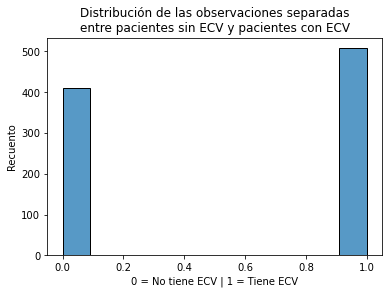

In [4]:
sns.histplot(data["HeartDisease"])
plt.title("Distribución de las observaciones separadas\n"+
          "entre pacientes sin ECV y pacientes con ECV")
plt.ylabel("Recuento")
plt.xlabel("0 = No tiene ECV | 1 = Tiene ECV")

## Análisis exploratorio de los datos<a id="23"></a>

### Limpieza inicial de los datos<a id="231"></a>

Buscamos valores nulos:

In [5]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

En este dataset no tenemos valores nulos. 

Aún así, vamos a buscar valores anormales. Para hacerlo, mostraremos qué columnas tienen valores igual a 0, y analizaremos si tiene sentido éste valor.

In [6]:
for n in data.columns:
    print(n,"\n" ,data.loc[data[n]==0][n],"\n\n\n")

Age 
 Series([], Name: Age, dtype: int64) 



Sex 
 Series([], Name: Sex, dtype: object) 



ChestPainType 
 Series([], Name: ChestPainType, dtype: object) 



RestingBP 
 449    0
Name: RestingBP, dtype: int64 



Cholesterol 
 293    0
294    0
295    0
296    0
297    0
      ..
514    0
515    0
518    0
535    0
536    0
Name: Cholesterol, Length: 172, dtype: int64 



FastingBS 
 0      0
1      0
2      0
3      0
4      0
      ..
912    0
913    0
915    0
916    0
917    0
Name: FastingBS, Length: 704, dtype: int64 



RestingECG 
 Series([], Name: RestingECG, dtype: object) 



MaxHR 
 Series([], Name: MaxHR, dtype: int64) 



ExerciseAngina 
 Series([], Name: ExerciseAngina, dtype: object) 



Oldpeak 
 0      0.0
2      0.0
4      0.0
5      0.0
6      0.0
      ... 
904    0.0
909    0.0
910    0.0
916    0.0
917    0.0
Name: Oldpeak, Length: 368, dtype: float64 



ST_Slope 
 Series([], Name: ST_Slope, dtype: object) 



HeartDisease 
 0      0
2      0
4      0
5      0

Podemos ver que hay varias columnas con valores igual a 0. 

Para las columnas FastingBS y HeartDisease, es normal tener valores igual a 0, dado que son variables booleanas. 

En la columna Oldpeak también tenemos valores igual a 0, pero ello es debido a que la distrubución va desde rangos negativos hasta rangos postitivos, con lo que es normal tener valores igual a 0. 

Finalmente, tenemos la columna del colesterol, en la cual el valor 0 no es posible, dado que no es posible tener un colesterol igual a 0, y el hecho de que aparezcan estos datos puede ser debido a que haya un fallo en la recolección de los datos. También tenemos una fila con un 0 en la columna RestingBP, lo cual to tiene sentido, dado que las pulsaciones no pueden ser igual a 0 para una persona viva.

Así pues tenemos que decidir qué hacemos con estas filas. Para la columna Cholesterol, dado que hay 172 filas con colesterol igual a 0, éstas representan un 19% del total de filas, con lo cual es un valor lo suficientemente bajo como para que no tengamos que eliminar la columna. Tal y cómo hemos visto en la [Figura 1](#Figura1), los datos no están ordenados, de modo que para realizar una sustitución de forma aleatoria, vamos a sustituir cada 0 por el anterior valor distinto a 0 en la columna. En el caso de la columna RestingBP, como sólo tenemos una fila con valor igual a 0, simplemente eliminaremos esa observación.

In [7]:
data["Cholesterol"].replace(to_replace=0, method="ffill", inplace=True)
print(data.loc[data["Cholesterol"]==0]["Cholesterol"])

data.drop(data[data["RestingBP"]==0].index, inplace=True)
print(data.loc[data["RestingBP"]==0]["RestingBP"])

Series([], Name: Cholesterol, dtype: int64)
Series([], Name: RestingBP, dtype: int64)


## Análisis del impacto de la edad<a id="232"></a>

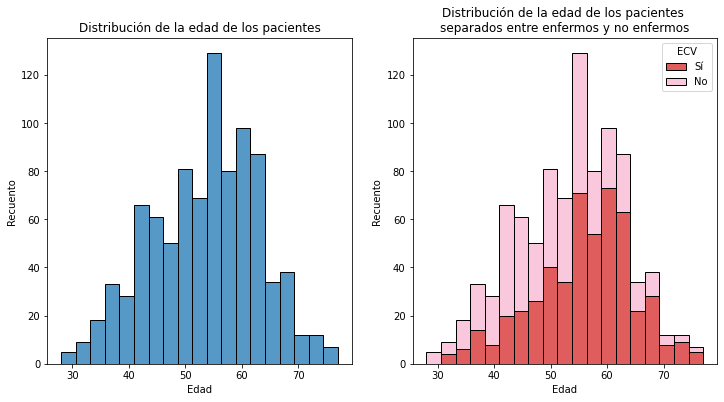

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data=data, x="Age", ax=ax[0])
ax[0].set_title("Distribución de la edad de los pacientes")
ax[0].set_xlabel("Edad")
ax[0].set_ylabel("Recuento")
sns.histplot(data=data, x="Age", hue="HeartDisease", multiple="stack", ax=ax[1], palette="tab20_r")
ax[1].set_title("Distribución de la edad de los pacientes \nseparados entre enfermos y no enfermos")
ax[1].set_xlabel("Edad")
ax[1].set_ylabel("Recuento")
ax[1].legend(title='ECV', labels=['Sí', 'No'])

En estos gráficos mostramos, en el primero, la distribución de la edad de la población sobre la que se ha hecho el estudio, y en el segundo, la misma distribución, pero separando entre personas con alguna ECV y personas sin ninguna ECV.

Como podemos ver, por debajo de los 30 años, aunque hay pocos datos, se ve claramente como no hay ningún caso de ECV. A medida que aumentamos el rango de edad, vemos que entre  los 30 y los 45, aunque ya se observan más casos, el total de observaciones de pacientes con ECV se encuentra por debajo del 50%. Si nos fijamos en el rango de 45 a 55, el recuento está sobre el 50%, y a partir de los 55 años, vemos cómo el porcentaje de pacientes con ECV aumenta considerablemente, sobretodo a partir de los 70 años, donde ya más de tres cuartas partes de los pacientes observados tienen  alguna ECV.

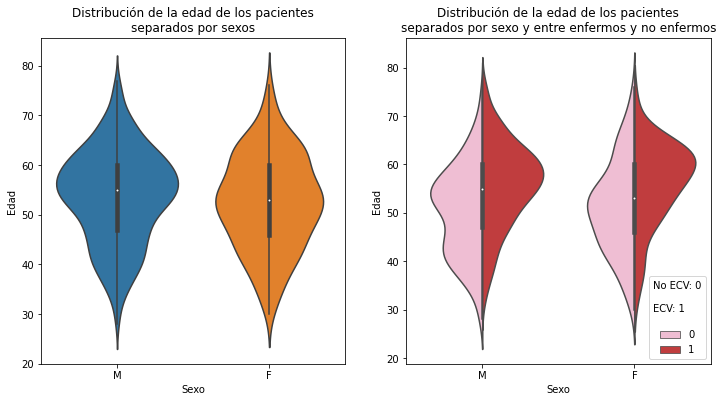

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.violinplot(data=data, x="Sex", y="Age", ax=ax[0], palette="tab10")
ax[0].set_title("Distribución de la edad de los pacientes\nseparados por sexos")
ax[0].set_xlabel("Sexo")
ax[0].set_ylabel("Edad")
sns.violinplot(data=data, x="Sex", y="Age", hue="HeartDisease", split=True, ax=ax[1], palette="tab20_r")
ax[1].set_title("Distribución de la edad de los pacientes\nseparados por sexo y entre enfermos y no enfermos")
ax[1].set_xlabel("Sexo")
ax[1].set_ylabel("Edad")
ax[1].legend(title='No ECV: 0\n\nECV: 1\n', loc="lower right")

Vemos que la distribución de los pacientes según su sexo es bastante similar, con la media de edad de las mujeres siendo un par de años inferior a la de los hombres. Sin embargo, cuando discriminamos los datos según si tienen enfermedades del corazón o no, observamos que ésto se invierte, siendo la media de edad de las mujeres con enfermedades del corazón ligeramente superior a la de los hombres, lo que puede significar que los hombres tienen más riesgo de desarrollar enfermedades del corazón siendo más jovenes que las mujeres.

Text(0.5, 1.0, 'Relación entre edad y pulso cardíaco en reposo')

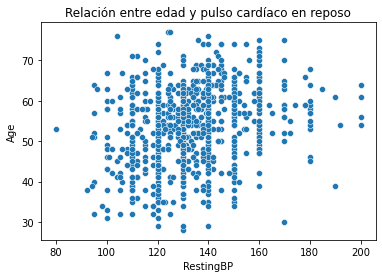

In [10]:
sns.scatterplot(data=data, x="RestingBP", y="Age")
plt.title("Relación entre edad y pulso cardíaco en reposo")

Text(24.049999999999997, 0.5, 'Edad')

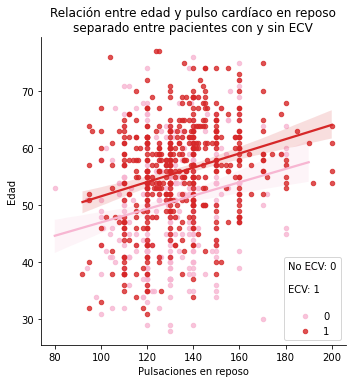

In [11]:
sns.lmplot(data=data, x="RestingBP", y="Age", hue="HeartDisease", palette="tab20_r", scatter_kws={"s": 20}, legend=False)
plt.title("Relación entre edad y pulso cardíaco en reposo\nseparado entre pacientes con y sin ECV")
plt.legend(title='No ECV: 0\n\nECV: 1\n', loc="lower right")
plt.xlabel("Pulsaciones en reposo")
plt.ylabel("Edad")

Estos gráficos nos indican que, a mayor edad, mayor es el pulso cardíaco en reposo, y a mayor ritmo cardíaco en reposo, mayor es la probabilidad de desarrollar una ECV. Aún así, es posible que ésto no tenga ningún impacto signigicativoen el desarrollo de ECV, dado que las líneas de tendencia son paralelas, de modo que lo que impacta es la edad, así que, para el estudio de posibles ECV, es posible que estas dos variables esten autocorrelacionadas.

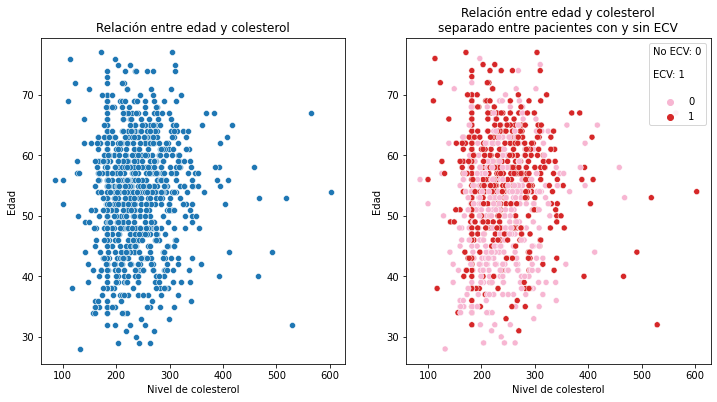

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(data=data, x="Cholesterol", y="Age", ax=ax[0], palette="tab10")
ax[0].set_title("Relación entre edad y colesterol")
ax[0].set_ylabel("Edad")
ax[0].set_xlabel("Nivel de colesterol")

sns.scatterplot(data=data, x="Cholesterol", y="Age", hue="HeartDisease", ax=ax[1], palette="tab20_r")
ax[1].set_title("Relación entre edad y colesterol\nseparado entre pacientes con y sin ECV")
ax[1].set_ylabel("Edad")
ax[1].set_xlabel("Nivel de colesterol")
ax[1].legend(title='No ECV: 0\n\nECV: 1\n')

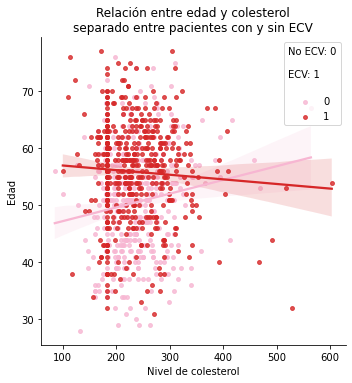

In [13]:
sns.lmplot(data=data, x="Cholesterol", y="Age", hue="HeartDisease", palette="tab20_r", scatter_kws={"s": 15}, legend=False)
plt.title("Relación entre edad y colesterol\nseparado entre pacientes con y sin ECV")
plt.ylabel("Edad")
plt.xlabel("Nivel de colesterol")
plt.legend(title='No ECV: 0\n\nECV: 1\n')

A medida que aumenta el colesterol, se disminuye la edad de los pacientes con enfermedades del corazón, y se puede ver claramente que aquellos pacientes con un nivel de colesterol extremadamente alto (superior a 400), tienen muchas probabilidades de sufrir enfermedades del corazón, independientemente de la edad que tengan.

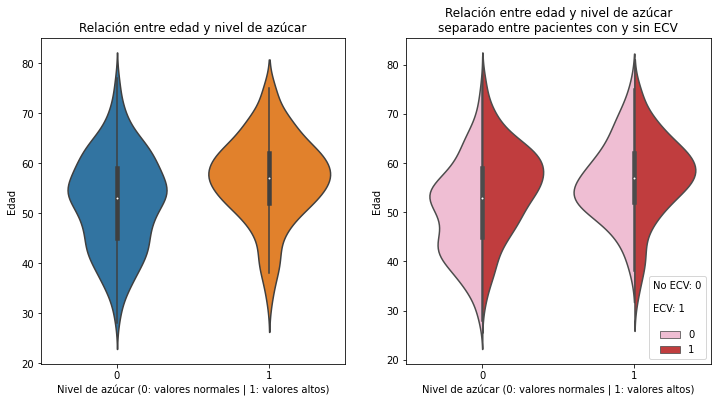

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.violinplot(data=data, x="FastingBS", y="Age", ax=ax[0], palette="tab10")
ax[0].set_title("Relación entre edad y nivel de azúcar")
sns.violinplot(data=data, x="FastingBS", y="Age", hue="HeartDisease", split=True, ax=ax[1], palette="tab20_r")
ax[1].set_title("Relación entre edad y nivel de azúcar\nseparado entre pacientes con y sin ECV")

for n in [0, 1]:
    ax[n].set_xlabel("Nivel de azúcar (0: valores normales | 1: valores altos)")
    ax[n].set_ylabel("Edad")
ax[1].legend(title='No ECV: 0\n\nECV: 1\n', loc="lower right")

A mayor edad, mayor probabilidad de tener los niveles de azúcar en sangre elevados. En cuanto al impacto del nivel de azucar en sangre, en relación a la edad y la probabilidad de tener una enfermedad del corazon, vemos que no tiene una afectación observable.

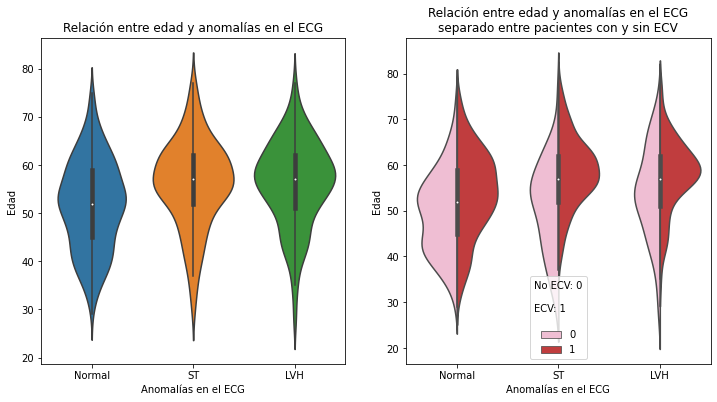

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.violinplot(data=data, x="RestingECG", y="Age", ax=ax[0], palette="tab10")
ax[0].set_title("Relación entre edad y anomalías en el ECG")

sns.violinplot(data=data, x="RestingECG", y="Age", hue="HeartDisease", split=True, ax=ax[1], palette="tab20_r")
ax[1].set_title("Relación entre edad y anomalías en el ECG\nseparado entre pacientes con y sin ECV")
ax[1].legend(title='No ECV: 0\n\nECV: 1\n')

for n in [0, 1]:
    ax[n].set_xlabel("Anomalías en el ECG")
    ax[n].set_ylabel("Edad")

Si el paciente tiene una anomalía ST o LVH, tiene altas probabilidades de desarrollar una enfermedad en el corazón, sobretodo a partir de los 50 años. En caso de tener un ECG normal, las probabilidades de desarrollar una ECV no sólo se reducen, sino que también se distribuyen de forma más uniforme a lo largo de todo el rango de edad.

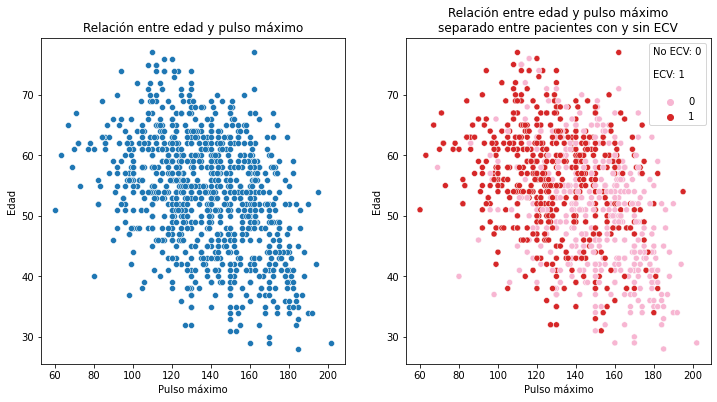

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(data=data, x="MaxHR", y="Age", ax=ax[0], palette="tab10")
ax[0].set_title("Relación entre edad y pulso máximo")

sns.scatterplot(data=data, x="MaxHR", y="Age", hue="HeartDisease", ax=ax[1], palette="tab20_r")
ax[1].set_title("Relación entre edad y pulso máximo\nseparado entre pacientes con y sin ECV")
ax[1].legend(title='No ECV: 0\n\nECV: 1\n')

for n in [0, 1]:
    ax[n].set_xlabel("Pulso máximo")
    ax[n].set_ylabel("Edad")

Text(24.049999999999997, 0.5, 'Edad')

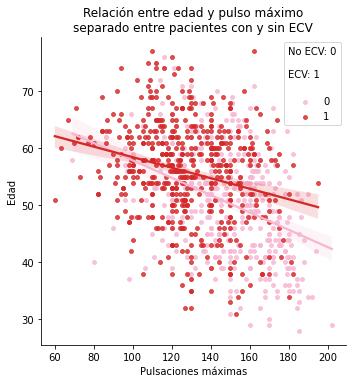

In [17]:

sns.lmplot(data=data, x="MaxHR", y="Age", hue="HeartDisease", palette="tab20_r", scatter_kws={"s": 15}, legend=False)
plt.title("Relación entre edad y pulso máximo\nseparado entre pacientes con y sin ECV")
plt.legend(title='No ECV: 0\n\nECV: 1\n')
plt.xlabel("Pulsaciones máximas")
plt.ylabel("Edad")

A mayor edad, menor es el pulso máximo del corazón, y un pulso máximo del corazón bajo hace que la probabilidad de tener una enfermedad del corazón aumente, con lo que el pulso máximo puede ser una causa de enfermedad del corazón.

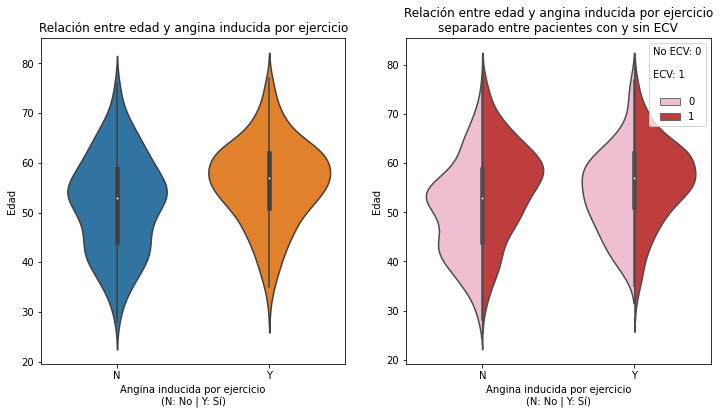

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.violinplot(data=data, x="ExerciseAngina", y="Age", ax=ax[0], palette="tab10")
ax[0].set_title("Relación entre edad y angina inducida por ejercicio")

sns.violinplot(data=data, x="ExerciseAngina", y="Age", hue="HeartDisease", split=True, ax=ax[1], palette="tab20_r")
ax[1].set_title("Relación entre edad y angina inducida por ejercicio\nseparado entre pacientes con y sin ECV")
ax[1].legend(title='No ECV: 0\n\nECV: 1\n')

for n in [0, 1]:
    ax[n].set_xlabel("Angina inducida por ejercicio\n(N: No | Y: Sí)")
    ax[n].set_ylabel("Edad")

En ésta comparativa podemos ver que, a mayor edad, más probable es que se induzca una angina mediante el ejercicio físico. Aún así, el hecho de que aparezca una angina mediante el ejericio, no parece tener impacto en la probabilidad de desarrollar una ECV.

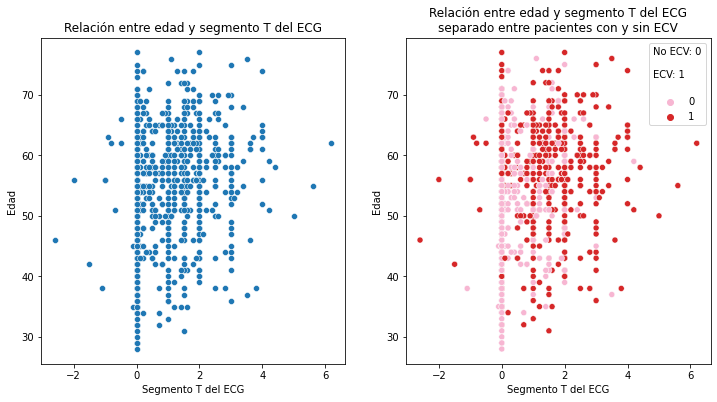

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(data=data, x="Oldpeak", y="Age", ax=ax[0], palette="tab10")
ax[0].set_title("Relación entre edad y segmento T del ECG")

sns.scatterplot(data=data, x="Oldpeak", y="Age", hue="HeartDisease", ax=ax[1], palette="tab20_r")
ax[1].set_title("Relación entre edad y segmento T del ECG\nseparado entre pacientes con y sin ECV")
ax[1].legend(title='No ECV: 0\n\nECV: 1\n')

for n in [0, 1]:
    ax[n].set_xlabel("Segmento T del ECG")
    ax[n].set_ylabel("Edad")

Cuando comparamos el segmento T del ECG con la edad, observamos que a partir de los 50 años, aumentan considerablemente las observaciones en las que se ve un segmento T con valores superiores a 0, mientras que en gente más joven, la distribución tiende más a estar en 0. Al analizar el impacto de este segmento T, observamos que, a medida que se aleja del 0 (ya sea en positivo o en negativo), se incrementa muy notablemente la probabilidad de sufrir una ECV.-

### ***CONCLUSIONES DIMENSIÓN EDAD***

Hasta ahora hemos visto el impacto de la edad en distintos factores de riesgo, y hemos podido observar claramente que con la edad, aumentan muchos de los indicadores de riesgo, de modo que, a mayor edad, mayor riesgo de tener alguna ECV.

## Análisis del impacto del sexo<a id="233"></a>

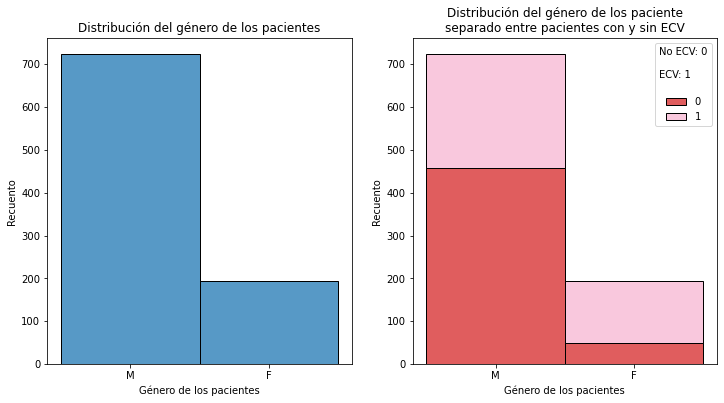

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.histplot(data=data, x="Sex", ax=ax[0])
ax[0].set_title("Distribución del género de los pacientes")

sns.histplot(data=data, x="Sex", hue="HeartDisease", multiple="stack", ax=ax[1], palette="tab20_r")
ax[1].set_title("Distribución del género de los paciente\nseparado entre pacientes con y sin ECV")
ax[1].legend(title='No ECV: 0\n\nECV: 1\n', labels=[0, 1])

for n in [0, 1]:
    ax[n].set_xlabel("Género de los pacientes")
    ax[n].set_ylabel("Recuento")

En esta distribución, podemos observar que la mayoría de la población estudiada son hombres. Además, cuando discretizamos entre personas con ECV o sin ellas, podemos ver que en el caso de los hombres la proporción de pacientes con alguna ECV es muy elevada, mientras que en el caso de las mujeres es notablemente baja.

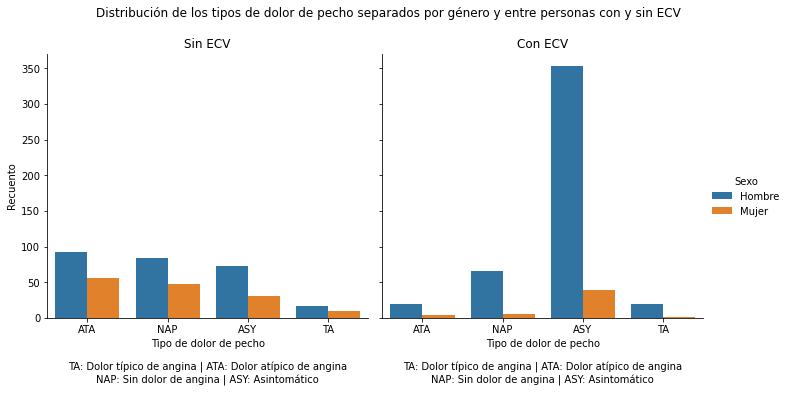

In [21]:
g = sns.catplot(data=data, x="ChestPainType", kind="count", hue="Sex", col="HeartDisease", legend=False)
axes = g.axes.flatten()

g.set_ylabels("Recuento")
g.set_xlabels("Tipo de dolor de pecho\n\n"+
             "TA: Dolor típico de angina | ATA: Dolor atípico de angina\n" + 
              "NAP: Sin dolor de angina | ASY: Asintomático")
g.fig.subplots_adjust(top=0.85)
plt.suptitle("Distribución de los tipos de dolor de pecho separados por género y entre personas con y sin ECV\n\n")
axes[0].set_title("Sin ECV")
axes[1].set_title("Con ECV")
g.add_legend(title="Sexo", **{"labels":["Hombre", "Mujer"]})

Al observar los tipos de dolor de pecho, vemos que la distribución es bastante similar entre hombres y mujeres cuando no tienen ninguna enfermedad cardiovascular, en cambio, para los pacientes con ECV, vemos que, aunque para ambos géneros la mayor parte no tiene ningun síntoma de éste tipo, en el caso de los hombres vemos que hay más casos con dolor de pecho que en las mujeres, en las que prácticamente no se observa ningún tipo de dolor de pecho.

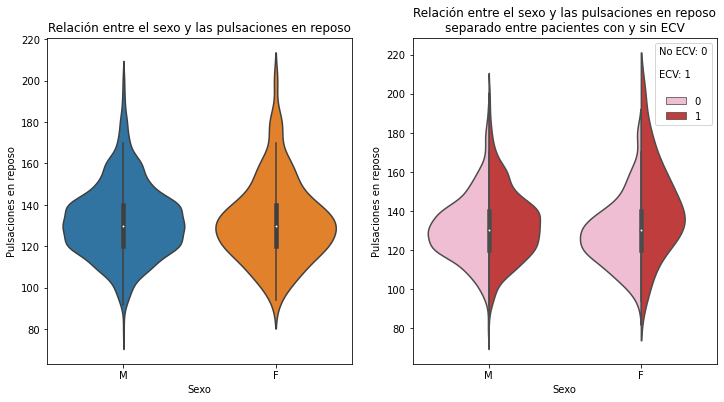

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.violinplot(data=data, x="Sex", y="RestingBP", ax=ax[0], palette="tab10")
ax[0].set_title("Relación entre el sexo y las pulsaciones en reposo")

sns.violinplot(data=data, x="Sex", y="RestingBP", hue="HeartDisease", split=True, ax=ax[1], palette="tab20_r")
ax[1].set_title("Relación entre el sexo y las pulsaciones en reposo\nseparado entre pacientes con y sin ECV")
ax[1].legend(title='No ECV: 0\n\nECV: 1\n')

for n in [0, 1]:
    ax[n].set_xlabel("Sexo")
    ax[n].set_ylabel("Pulsaciones en reposo")

Mientras que la distribución es bastante similar entre hombres y mujeres, las mujeres necesitan tener un pulso en reposo mayor que los hombres para tener las mismas probabilidades para desarrollar una enfermedad del corazón, mientras que en el caso de los hombres, tienen una elevada probabilidad de tener una enfermedad del corazón aún teniendo un pulso en reposo en  unos valores normales.

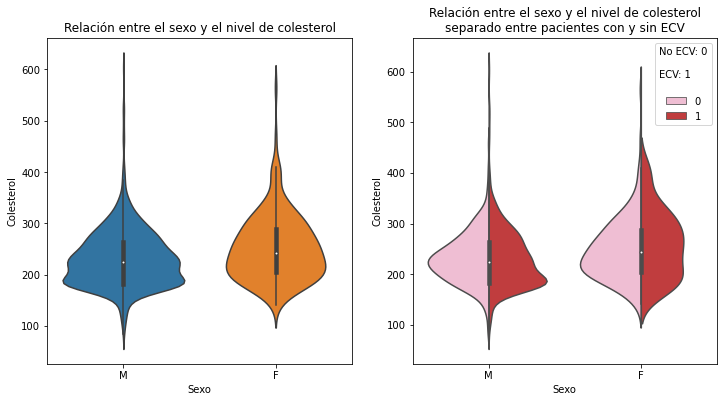

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.violinplot(data=data, x="Sex", y="Cholesterol", ax=ax[0], palette="tab10")
ax[0].set_title("Relación entre el sexo y el nivel de colesterol")

sns.violinplot(data=data, x="Sex", y="Cholesterol", hue="HeartDisease", split=True, ax=ax[1], palette="tab20_r")
ax[1].set_title("Relación entre el sexo y el nivel de colesterol\nseparado entre pacientes con y sin ECV")
ax[1].legend(title='No ECV: 0\n\nECV: 1\n')

for n in [0, 1]:
    ax[n].set_xlabel("Sexo")
    ax[n].set_ylabel("Colesterol")

Lo primero que observamos al ver la distribución del colesterol separado por sexos es que, mientras en los hombres se concentra principalmente alrededor de 200, en las mujeres se ven unos valores más distribuidos y ligeramente superiores, encontrándose la mayoría entre 200 y 300. Al analizar los casos de ECV, vemos que, mientras que en los hombre, la mayotía de casos se encuentra con unos valores cerca de 200, y los casos sin ECV estan por encima de 200, en las mujeres, los valores se distribuyen de forma prácticamente uniforme desde 200 hasta 300, de forma que parece ser que, mientras que en los hombres, el colesterol no tiene mucho impacto en las ECV, en las mujeres sí podemos ver como a mayor colesterol, mayor es la probabilidad de sufrir una ECV.

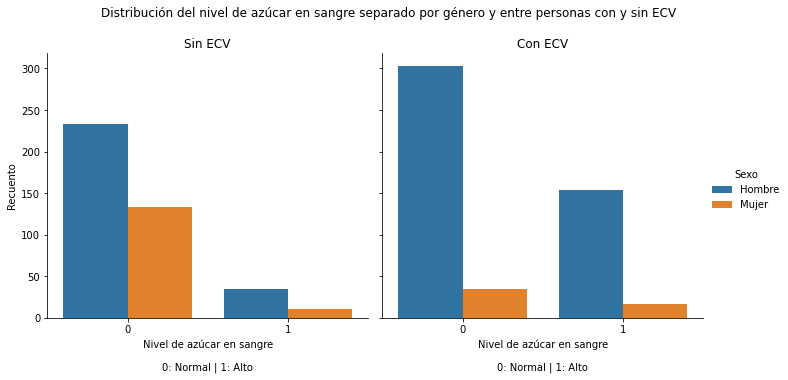

In [24]:
g = sns.catplot(data=data, x="FastingBS", kind="count", hue="Sex", col="HeartDisease", legend=False)
axes = g.axes.flatten()
g.set_ylabels("Recuento")
g.set_xlabels("Nivel de azúcar en sangre\n\n0: Normal | 1: Alto")
g.fig.subplots_adjust(top=0.85)
plt.suptitle("Distribución del nivel de azúcar en sangre separado por género y entre personas con y sin ECV\n\n")
axes[0].set_title("Sin ECV")
axes[1].set_title("Con ECV")
g.add_legend(title="Sexo", **{"labels":["Hombre", "Mujer"]})

En el caso del nivel de azúcar en sangre, no vemos un gran impacto, y lo único que puede llamarnos la atención es que en el caso de los hombres, cuando el nivel de azucar es alto, aumentan ligeramente las probabilidades de tener una enfermedad del corazón, pero tampoco es algo que se vea de forma clara.

<AxesSubplot:xlabel='RestingECG', ylabel='Count'>

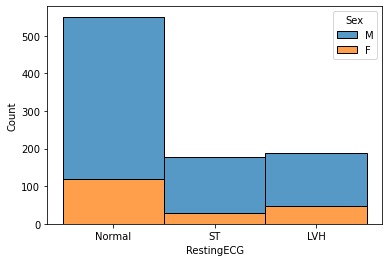

In [25]:
sns.histplot(data=data, x="RestingECG", hue="Sex", multiple="stack")

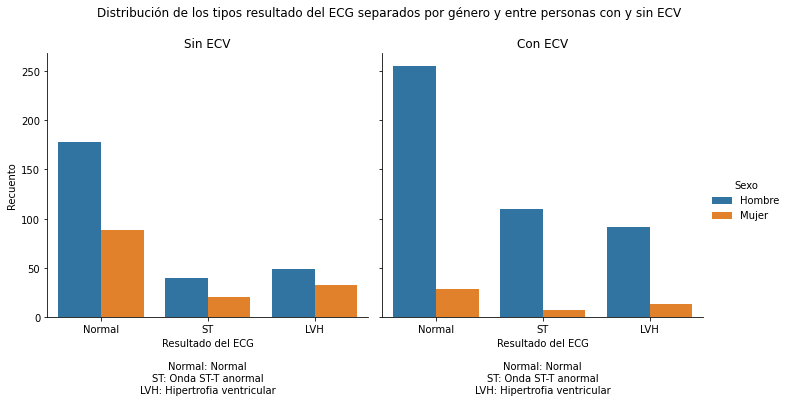

In [26]:
g = sns.catplot(data=data, x="RestingECG", kind="count", hue="Sex", col="HeartDisease", legend=False)
axes = g.axes.flatten()
g.set_ylabels("Recuento")
g.set_xlabels("Resultado del ECG\n\n"+
             "Normal: Normal\nST: Onda ST-T anormal\nLVH: Hipertrofia ventricular")
g.fig.subplots_adjust(top=0.85)
plt.suptitle("Distribución de los tipos resultado del ECG separados por género y entre personas con y sin ECV\n\n")
axes[0].set_title("Sin ECV")
axes[1].set_title("Con ECV")
g.add_legend(title="Sexo", **{"labels":["Hombre", "Mujer"]})

Para los resultados del electrocardiograma en reposo, no se pueden observar grandes diferencias entre sexos más allá de que las mujeres tienen una ligera tendencia superior a los hombres a mostrar una hipertrofia ventricular, pero sin demasiado impacto. Lo que sí que es curioso, es que en el caso de los hombres con alguna ECV, la proporción de observaciones con un ECG normal es muy elevada, con lo cual puede ser más dificil para éste sexo el hacer un diagnóstico claro con sólo un EGC, y aunque esta prueba puede aportar una información realmente valiosa, hay más variables a tener en cuenta.

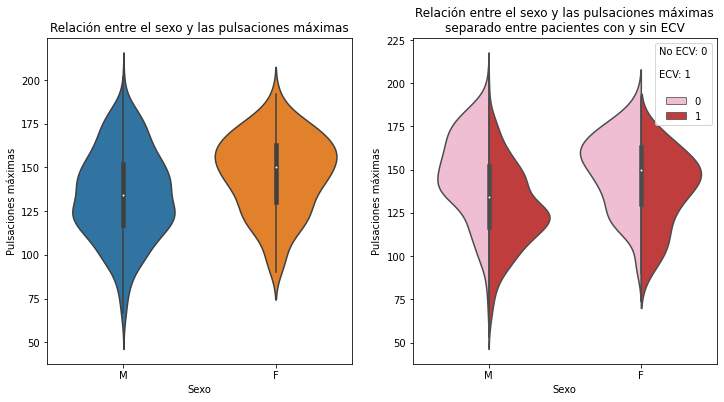

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.violinplot(data=data, x="Sex", y="MaxHR", ax=ax[0], palette="tab10")
ax[0].set_title("Relación entre el sexo y las pulsaciones máximas")

sns.violinplot(data=data, x="Sex", y="MaxHR", hue="HeartDisease", split=True, ax=ax[1], palette="tab20_r")
ax[1].set_title("Relación entre el sexo y las pulsaciones máximas\nseparado entre pacientes con y sin ECV")
ax[1].legend(title='No ECV: 0\n\nECV: 1\n')

for n in [0, 1]:
    ax[n].set_xlabel("Sexo")
    ax[n].set_ylabel("Pulsaciones máximas")

Ya habíamos visto que cuanto menor fuese el pulso máximo, más probabilidades había de tener una enfermedad del corazón.

Lo primero que podemos observar aquí es que, en general, los hombres tienen el pulso máximo por debajo de el de las mujeres. Aún así, podemos observar que las mujeres no necesitan tener un pulso máximo tan bajo como los hombres para tener las mismas probabilidades de desarrollar una enfermedad del corazón, dado que con las mujeres, el pico de la distribución de las pacientes con enfermedades del corazón está en aproximadamente 150 pulsos por minuto, mientras que en los hombres está en 125 pulsos por minuto.

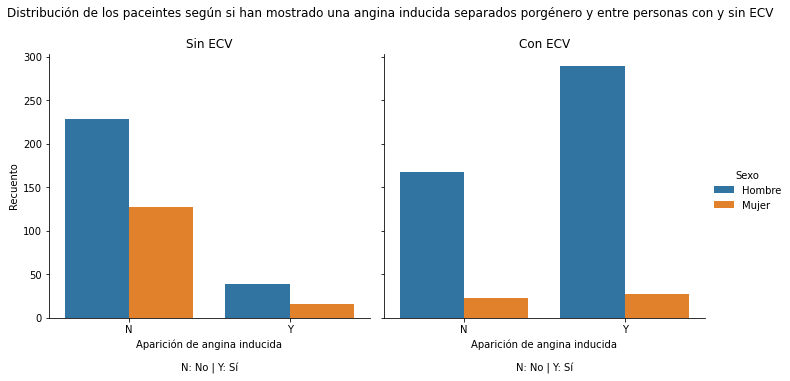

In [28]:
g = sns.catplot(data=data, x="ExerciseAngina", kind="count", hue="Sex", col="HeartDisease", legend=False)
axes = g.axes.flatten()
g.set_ylabels("Recuento")
g.set_xlabels("Aparición de angina inducida\n\n"+
             "N: No | Y: Sí")
g.fig.subplots_adjust(top=0.85)
plt.suptitle("Distribución de los paceintes según si han mostrado una angina inducida separados por"+
             "género y entre personas con y sin ECV\n\n")
axes[0].set_title("Sin ECV")
axes[1].set_title("Con ECV")
g.add_legend(title="Sexo", **{"labels":["Hombre", "Mujer"]})

A diferencia de lo que hemos visto en el caso anterior, aquí podemos ver claramente como el hecho de que aparezca una angina inducida, es un claro indicador de que puede haber una ECV, aunque el hecho de que no aparezca tampoco sirve para descartar una enfermedad de tal tipo. En cuanto a la separación entre géneros, éste indicador es mucho más claro para los hombres, mientras que para las mujeres, el hecho de que no aparezca sí que tiene más peso en deducir que las probabilidades de que no exista una ECV son elevadas.

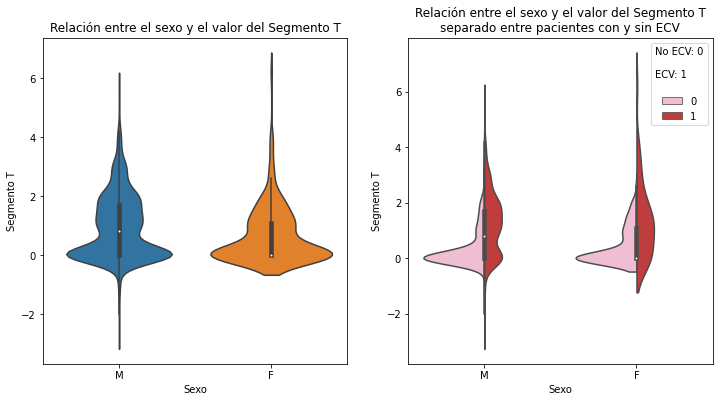

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.violinplot(data=data, x="Sex", y="Oldpeak", ax=ax[0], palette="tab10")
ax[0].set_title("Relación entre el sexo y el valor del Segmento T")

sns.violinplot(data=data, x="Sex", y="Oldpeak", hue="HeartDisease", split=True, ax=ax[1], palette="tab20_r")
ax[1].set_title("Relación entre el sexo y el valor del Segmento T\nseparado entre pacientes con y sin ECV")
ax[1].legend(title='No ECV: 0\n\nECV: 1\n')

for n in [0, 1]:
    ax[n].set_xlabel("Sexo")
    ax[n].set_ylabel("Segmento T")

0 o ligeramente positivo: sin enfermedad. el resto: con enfermedad. Hombres tienden a Oldpeak superior a las mujeres.
Al comparar el segmento T entre hombres y mujeres, vemos que las mujeres tienen una elevada concentración de casos en los que el segmento T es 0, y los casos que se salen de este valor, no se distancian mucho. En cambio, en los hombres, vemos como los valores se distribuyen más a lo largo del rango entre 0 y 3.

Este indicador podemos ver que tiene un alto impacto en las ECV, dado que mientras que los casos con el segmento T tienden a ser negativos en ECV, los casos con ECV tienen unos valores del segmento T mucho más distribuidos, de forma que, con esta variable en concreto, los hombres presentan un riesgo superior a sufrir una ECV por el hechode tener mayor tendencia a distanciarse del 0.

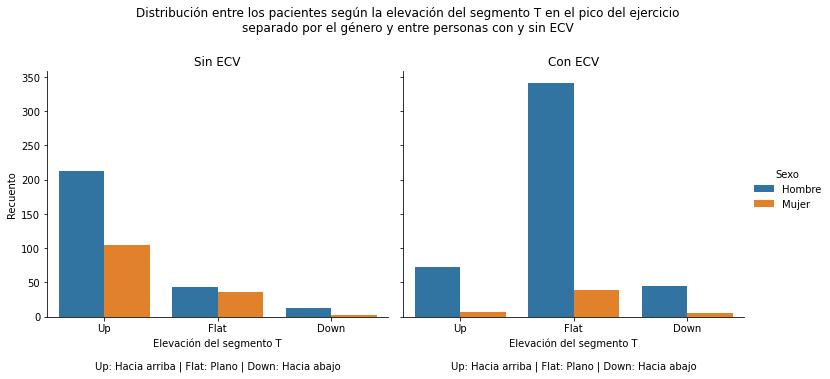

In [30]:
g = sns.catplot(data=data, x="ST_Slope", kind="count", hue="Sex", col="HeartDisease")
axes = g.axes.flatten()
g.set_ylabels("Recuento")
g.set_xlabels("Elevación del segmento T\n\n"+
             "Up: Hacia arriba | Flat: Plano | Down: Hacia abajo")

plt.suptitle("Distribución entre los pacientes según la elevación del segmento T en el pico del ejercicio\n"+
                "separado por el género y entre personas con y sin ECV\n\n")
g.fig.subplots_adjust(top=0.8)
axes[0].set_title("Sin ECV")
axes[1].set_title("Con ECV")
g.legend.remove()
g.add_legend(title="Sexo", **{"labels":["Hombre", "Mujer"]})

Finalmente, observamos la elevación del segmento T, en la que vemos que hay una distribución muy similar entre sexos, tanto para los casos sin ECV, como con los casos con ECV, con lo que, aunque la variable en sí nos aporta información de valor, no es preciso estudiarla ahora y lo haremos más adelante, sin necesidad de discriminar entre sexos.

### ***CONCLUSIONES SEXO***
En este sector hemos observado, principalmente que los hombres tienen mayor riesgo a sufrir una ECV que las mujeres, sobretodo si nos centramos en las variables del segmento T, el axucar en sangre, las pulsaciones máximas o la angina inducida.

Sin embargo, para las mujeres, en cuanto aumenta el pulso mínimo en reposo o el colesterol, su riesgo a sufrir una ECV aumenta de forma muy considerable.

## Análisis del impacto del tipo de dolor pectoral<a id="234"></a>

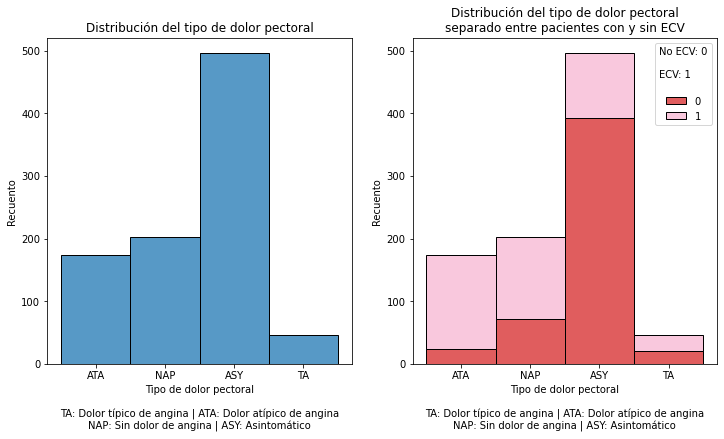

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=data, x="ChestPainType", ax=ax[0], palette="tab10")
ax[0].set_title("Distribución del tipo de dolor pectoral")
sns.histplot(data=data, x="ChestPainType", hue="HeartDisease", multiple="stack", ax=ax[1], palette="tab20_r")
ax[1].set_title("Distribución del tipo de dolor pectoral\nseparado entre pacientes con y sin ECV")
ax[1].legend(title='No ECV: 0\n\nECV: 1\n', labels=[0, 1])

for n in [0, 1]:
    ax[n].set_xlabel("Tipo de dolor pectoral\n\n"+
             "TA: Dolor típico de angina | ATA: Dolor atípico de angina\n" + 
              "NAP: Sin dolor de angina | ASY: Asintomático")
    ax[n].set_ylabel("Recuento")

Text(0, 0.5, 'Recuento')

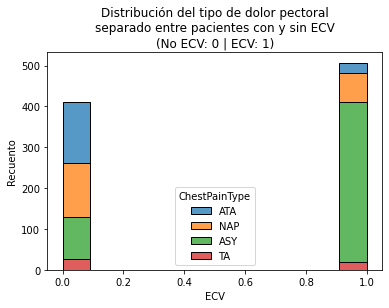

In [32]:
sns.histplot(data=data, x="HeartDisease", hue="ChestPainType", multiple="stack")
plt.title("Distribución del tipo de dolor pectoral\nseparado entre pacientes con y sin ECV\n(No ECV: 0 | ECV: 1)")
plt.xlabel("ECV")
plt.ylabel("Recuento")

En estos gráficos en los que vemos la distribución de los tipos de dolor de pecho de cada paciente, observamos que, en la mayoría de los casos, no existe ningún tipo de dolor en el pecho, y lo que es aún más curioso y puede plantear un reto es que si nos fijamos en los casos en los que existe una ECV, la proporción de casos sin ningún tipo de dolor pectoral se dispara, de forma que el tipo de dolor en el pecho puede ser un factor que puede llevar a confusión tanto a los médicos como a los propios pacientes, y por ello será interesante observar cómo se relaciona esta variable con las otras para poder ver si hay alguna causa subyacente a éste dolor, tanto si está relacionada con una ECV como si no lo está. 

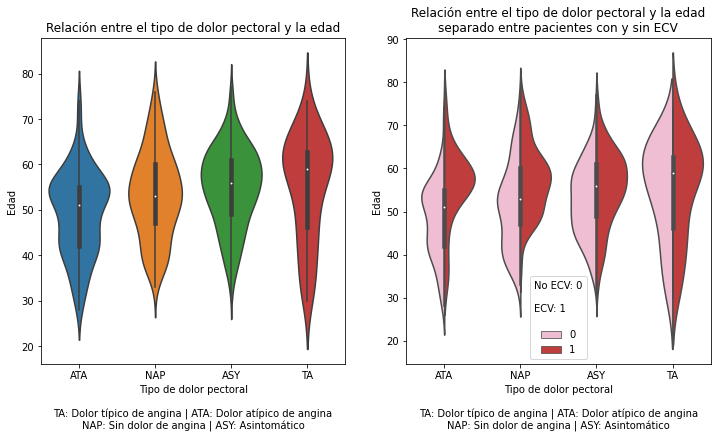

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.violinplot(data=data, x="ChestPainType", y="Age", ax=ax[0])
ax[0].set_title("Relación entre el tipo de dolor pectoral y la edad")

sns.violinplot(data=data, x="ChestPainType", y="Age", hue="HeartDisease", split=True, ax=ax[1], palette="tab20_r")
ax[1].set_title("Relación entre el tipo de dolor pectoral y la edad\nseparado entre pacientes con y sin ECV")
ax[1].legend(title='No ECV: 0\n\nECV: 1\n')

for n in [0, 1]:
    ax[n].set_xlabel("Tipo de dolor pectoral\n\n"+
             "TA: Dolor típico de angina | ATA: Dolor atípico de angina\n" + 
              "NAP: Sin dolor de angina | ASY: Asintomático")
    ax[n].set_ylabel("Edad")

Si separamos el tipo de dolor pectoral a lo largo del rango de edad, vemos que hay una distribución bastante clara en la que cada rango de edad tiene un tipo de dolor. Se observa que tanto el dolor atípico de angina como los casos sin dolor de angina se dan mayoritariamente en personas con una edad por debajo de los 55 años. En cambio, los pacientes asintomáticos tienen la mayor parte de la distribución sobre los 60 años, y finalmente, el dolor de angina típico se distribuye a lo largo de todo el rango de edad, pero con su pico en la personas mayores de 60 años.

El único impacto que se observa al tener en cuenta el dolor pectoral junto con la edad, es que para los pacientes con un dolor atípico de angina, a partir de los 55 años se dispara su probabilidad de sufrur una ECV. En los otros casos, la distribución de edad es bastante similar a cuando no discriminabamos entre pacientes con y sin ECV.

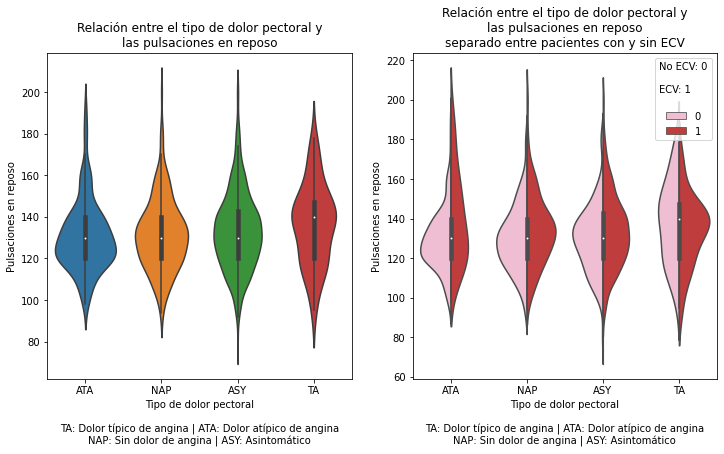

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.violinplot(data=data, x="ChestPainType", y="RestingBP", ax=ax[0])
ax[0].set_title("Relación entre el tipo de dolor pectoral y\nlas pulsaciones en reposo")

sns.violinplot(data=data, x="ChestPainType", y="RestingBP", hue="HeartDisease", split=True, ax=ax[1], palette="tab20_r")
ax[1].set_title("Relación entre el tipo de dolor pectoral y\nlas pulsaciones en reposo\nseparado entre pacientes con y sin ECV")
ax[1].legend(title='No ECV: 0\n\nECV: 1\n')

for n in [0, 1]:
    ax[n].set_xlabel("Tipo de dolor pectoral\n\n"+
             "TA: Dolor típico de angina | ATA: Dolor atípico de angina\n" + 
              "NAP: Sin dolor de angina | ASY: Asintomático")
    ax[n].set_ylabel("Pulsaciones en reposo")

Si comparamos los tipos de dolor pectoral junto con las pulsaciones en reposo, observamos que en todos los casos de dolor pectoral excepto con el dolor típico de angina, las pulsaciones tienen una distribución bastante similar. En el caso del lolor típico de angina, las pulsaciones en reposo aumentan considerablemente.

También observamos que cuando hay un dolor típico de angina, el hecho de tener las pulsaciones altas supone un alto riesgo para tener una ECV, mientras que en los otros casos, no parece que haya un gran impacto de éstas a la hora de tener una ECV.

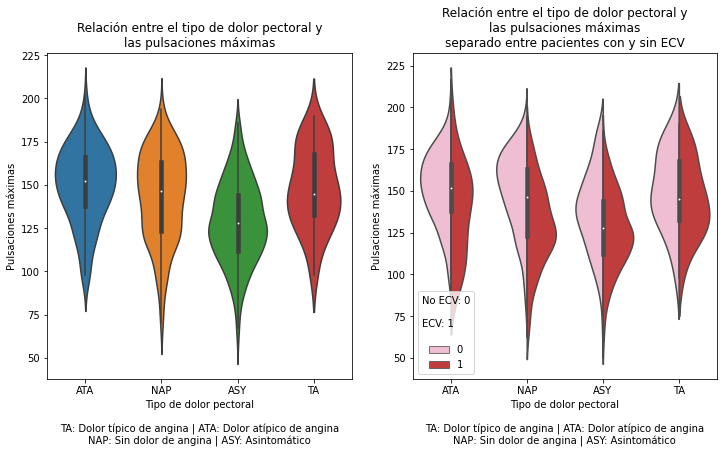

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.violinplot(data=data, x="ChestPainType", y="MaxHR", ax=ax[0])
ax[0].set_title("Relación entre el tipo de dolor pectoral y\nlas pulsaciones máximas")

sns.violinplot(data=data, x="ChestPainType", y="MaxHR", hue="HeartDisease", split=True, ax=ax[1], palette="tab20_r")
ax[1].set_title("Relación entre el tipo de dolor pectoral y\nlas pulsaciones máximas\nseparado entre pacientes con y sin ECV")
ax[1].legend(title='No ECV: 0\n\nECV: 1\n')

for n in [0, 1]:
    ax[n].set_xlabel("Tipo de dolor pectoral\n\n"+
             "TA: Dolor típico de angina | ATA: Dolor atípico de angina\n" + 
              "NAP: Sin dolor de angina | ASY: Asintomático")
    ax[n].set_ylabel("Pulsaciones máximas")

En estos gráficos vemos la comparativa entre los tipos de dolor pectoral y las pulsaciones máximas, y podemos ver ciertas diferencias en algunos de los campos. En el dolor atípico de angina, las pulsaciones máximas son muy elevadas, lo cual tiene sentido, dado que antes hemos visto que éste tipo de dolor se daba en pacientes más jóvenes, los cuales tienen mayor capacidad para tener altas pulsaciones. En el resto de casos, las pulsaciones máximas se distribuyen de forma bastante similar, aunque para los casos asintomáticos, las pulsaciones máximas se reducen ligeramente.

La única información que nos aporta la separación entre pacientes con y sin ECV, es que los pacientes con mayores pulsaciones máximas tienen menor riesgo a sufrir una ECV, pero no se ve ningún impacto en la separación entre tipos de dolor pectoral.

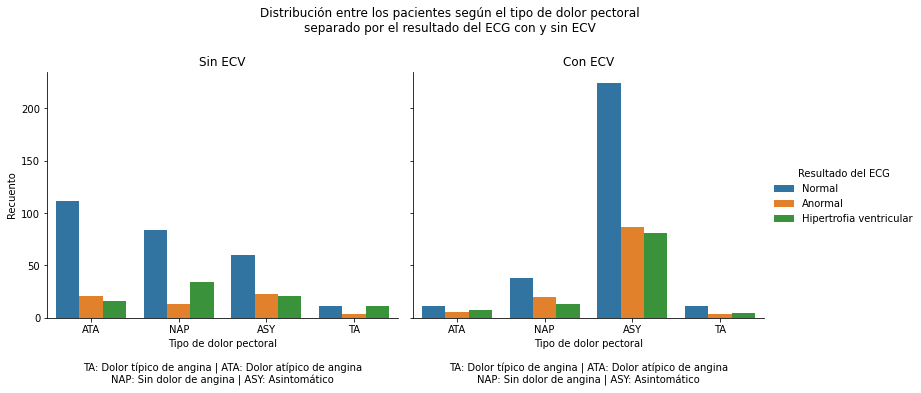

In [36]:
g = sns.catplot(data=data, x="ChestPainType", kind="count", hue="RestingECG", col="HeartDisease")
axes = g.axes.flatten()

g.set_ylabels("Recuento")
g.set_xlabels("Tipo de dolor pectoral\n\n"+
             "TA: Dolor típico de angina | ATA: Dolor atípico de angina\n" + 
              "NAP: Sin dolor de angina | ASY: Asintomático")

plt.suptitle("Distribución entre los pacientes según el tipo de dolor pectoral\n"+
                "separado por el resultado del ECG con y sin ECV\n\n")
g.fig.subplots_adjust(top=0.8)
axes[0].set_title("Sin ECV")
axes[1].set_title("Con ECV")
g.legend.remove()
g.add_legend(title="Resultado del ECG", **{"labels":["Normal", "Anormal", "Hipertrofia ventricular"]})

La comparativa entre el resultado del ECG y los tipos de dolor pectoral no nos aporta ninguna información de valor.

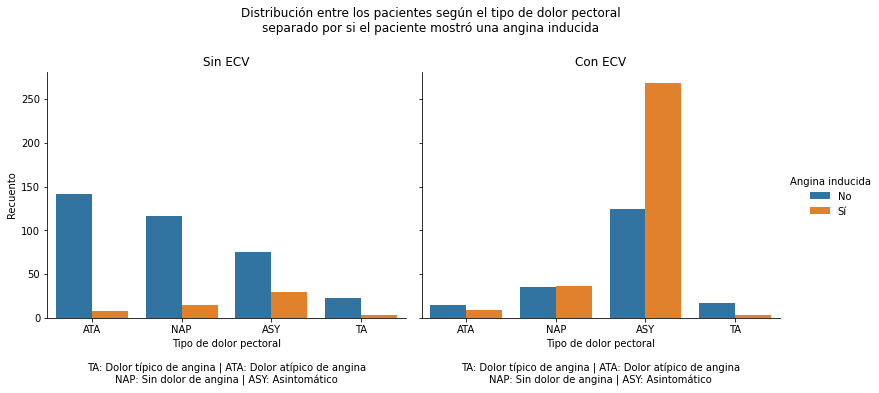

In [37]:
g = sns.catplot(data=data, x="ChestPainType", kind="count", hue="ExerciseAngina", col="HeartDisease")
axes = g.axes.flatten()

g.set_ylabels("Recuento")
g.set_xlabels("Tipo de dolor pectoral\n\n"+
             "TA: Dolor típico de angina | ATA: Dolor atípico de angina\n" + 
              "NAP: Sin dolor de angina | ASY: Asintomático")

plt.suptitle("Distribución entre los pacientes según el tipo de dolor pectoral\n"+
                "separado por si el paciente mostró una angina inducida\n\n")
g.fig.subplots_adjust(top=0.8)
axes[0].set_title("Sin ECV")
axes[1].set_title("Con ECV")
g.legend.remove()
g.add_legend(title="Angina inducida", **{"labels":["No", "Sí"]})

En el caso de la comparativa entre los tipos de dolor pectoral y la presencia de angina inducida, no vemos que tengan gran impacto una variable con la otra.

Lo que sí que podemos observar, es que las personas con angina inducida tienen alto riesgo de ECV, aunque no tengan dolor pectoral.

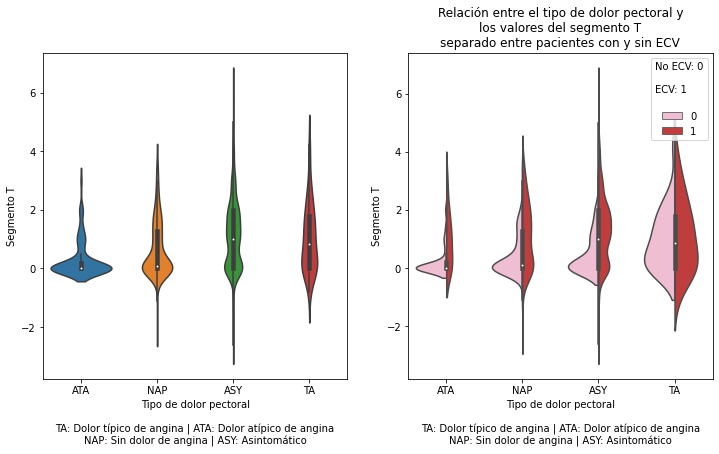

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.violinplot(data=data, x="ChestPainType", y="Oldpeak", ax=ax[0])
sns.violinplot(data=data, x="ChestPainType", y="Oldpeak", hue="HeartDisease", split=True, ax=ax[1], palette="tab20_r")
ax[1].set_title("Relación entre el tipo de dolor pectoral y\nlos valores del segmento T\nseparado entre pacientes con y sin ECV")
ax[1].legend(title='No ECV: 0\n\nECV: 1\n')

for n in [0, 1]:
    ax[n].set_xlabel("Tipo de dolor pectoral\n\n"+
             "TA: Dolor típico de angina | ATA: Dolor atípico de angina\n" + 
              "NAP: Sin dolor de angina | ASY: Asintomático")
    ax[n].set_ylabel("Segmento T")

Para la comparativa entre el segmento T y el tipo de dolor pectoral, vamos que las personas con dolor atípico de angina tienen el segmento T muy concentrado alrededor de 0, y para el resto de casos, está distribuido de forma más uniforme entre 0 y 2.

Vemos también que para las personas con dolor típico de angina, el segmento T no tiene impacto en el riesgo. Para el resto de casos, si el segmento T se distancia de 0, existe un alto riesgo de ECV.

### ***CONCLUSIONES TIPO DE DOLOR PECTORAL***
Para este sector, hemos visto que, para muchas variables, el tipo de dolor pectoral no tenía influencia en el aumento de riesgo de ECV, aunque también es debido a que tenemos una gran cantidad de observaciones de pacientes con ECV que son asintomáticos en cuanto a el dolor pectoral.

Donde sí hemos visto un impacto ha sido en la relación entre el segmento T y el dolor pectoral, dado que mientras que cuando no hay un dolor típico de angina, el tener el segmento T cercano a 0 reduce drásticamente la probabilidad de tener una ECV, cuando existe un dolor típico de angina, ésta varianble deja de ser relevante y se puede sufrir o no una ECV independientemente del valor del segmento T.

## Análisis del impacto de los resultados de los análisis de sangre<a id="235"></a>

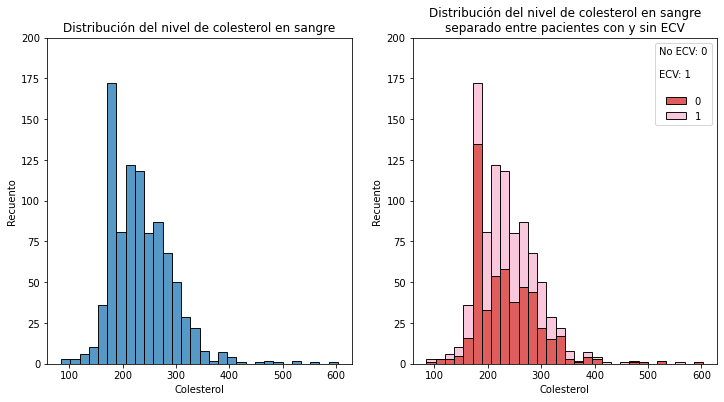

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=data, x="Cholesterol", bins=30, ax=ax[0])
ax[0].set_ylim(0, 200)
ax[0].set_title("Distribución del nivel de colesterol en sangre")

sns.histplot(data=data, x="Cholesterol", hue="HeartDisease", bins=30, ax=ax[1], multiple="stack", palette="tab20_r")
ax[1].set_ylim(0, 200)
ax[1].set_title("Distribución del nivel de colesterol en sangre\nseparado entre pacientes con y sin ECV")
ax[1].legend(title='No ECV: 0\n\nECV: 1\n', labels=[0, 1])

for n in [0, 1]:
    ax[n].set_xlabel("Colesterol")
    ax[n].set_ylabel("Recuento")

Aquí vemos la distribución del nivel de colesterol en sangre, y vemos que el pico de la distribución está sobre 200.

Podemos ver también claramente, que cuando los valores del nivel de colesterol aumentan, sobretodo a partir de 300, aumenta el riesgo de sufrir una ECV.

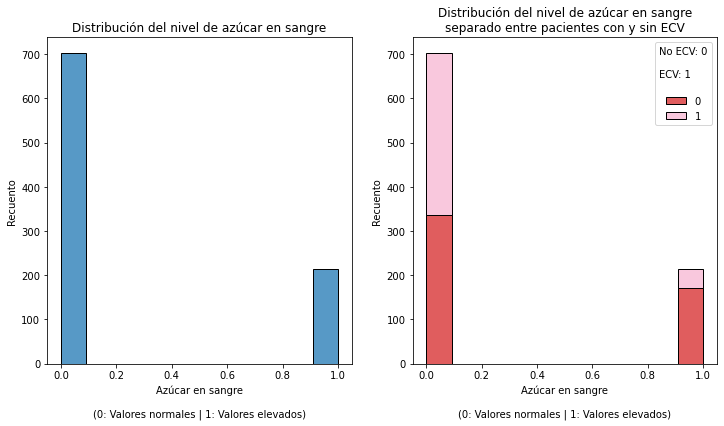

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=data, x="FastingBS", ax=ax[0])
ax[0].set_title("Distribución del nivel de azúcar en sangre")

sns.histplot(data=data, x="FastingBS", hue="HeartDisease", ax=ax[1], multiple="stack", palette="tab20_r")
ax[1].set_title("Distribución del nivel de azúcar en sangre\nseparado entre pacientes con y sin ECV")
ax[1].legend(title='No ECV: 0\n\nECV: 1\n', labels=[0, 1])

for n in [0, 1]:
    ax[n].set_xlabel("Azúcar en sangre\n\n(0: Valores normales | 1: Valores elevados)")
    ax[n].set_ylabel("Recuento")

Para la variable de el nivel de azúcar en sangre, vemos que, mientras que hay casi 700 observaciones con valores normales de azúcar en sangre y 200 para valores elevados, cuando nos fijamos en los casos con ECV, hay algo más de 300 casos con niveles normales de azúcar en sangre, y casi 200 casos con niveles elevados, de forma que podemos ver que el hecho de tener un nivel elevado de azúcar en sangre, aumenta consideramblemente el riesgo de sufrir una ECV. 

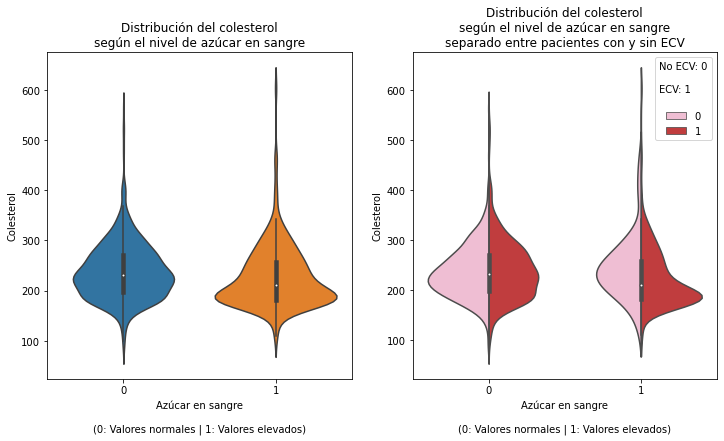

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.violinplot(data=data, x="FastingBS", y="Cholesterol", ax=ax[0])
ax[0].set_title("Distribución del colesterol\nsegún el nivel de azúcar en sangre")

sns.violinplot(data=data, x="FastingBS", y="Cholesterol", hue="HeartDisease", split=True, ax=ax[1], palette="tab20_r")
ax[1].set_title("Distribución del colesterol\nsegún el nivel de azúcar en sangre\nseparado entre pacientes con y sin ECV")
ax[1].legend(title='No ECV: 0\n\nECV: 1\n')

for n in [0, 1]:
    ax[n].set_xlabel("Azúcar en sangre\n\n(0: Valores normales | 1: Valores elevados)")
    ax[n].set_ylabel("Colesterol")

No podemos ver una relación entre estas dos variables.

### ***CONCLUSIONES ANÁLISIS DE SANGRE***
Ambas variables tienen un elevado impacto en el riesgo de sufrir una ECV, aunque no se observa una gran correlación ellas.

## Análisis del impacto de los resultados del electrocardiograma<a id="236"></a>

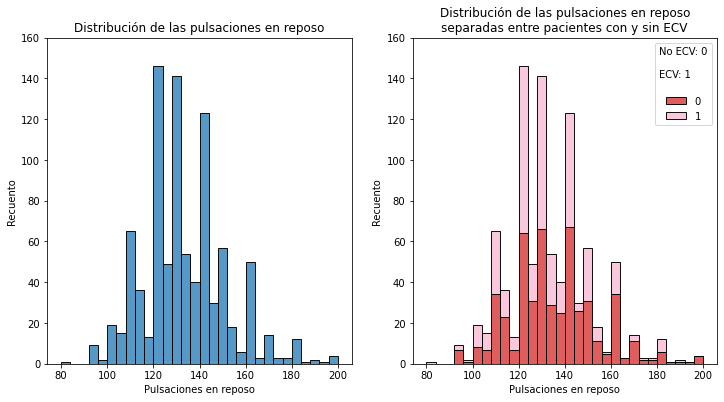

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=data, x="RestingBP", bins=30, ax=ax[0])
ax[0].set_ylim(0, 160)
ax[0].set_title("Distribución de las pulsaciones en reposo")

sns.histplot(data=data, x="RestingBP", hue="HeartDisease", bins=30, ax=ax[1], multiple="stack", palette="tab20_r")
ax[1].set_ylim(0, 160)
ax[1].set_title("Distribución de las pulsaciones en reposo\nseparadas entre pacientes con y sin ECV")
ax[1].legend(title='No ECV: 0\n\nECV: 1\n', labels=[0, 1])

for n in [0, 1]:
    ax[n].set_xlabel("Pulsaciones en reposo")
    ax[n].set_ylabel("Recuento")

La distribución de las pulsaciones en reposo es una distribución normal, con si pico alrededor de 130.

Se puede observar que a medida que aumentan éstas pulsaciones en reposo, mayor es el riesgo de sufrir una ECV.

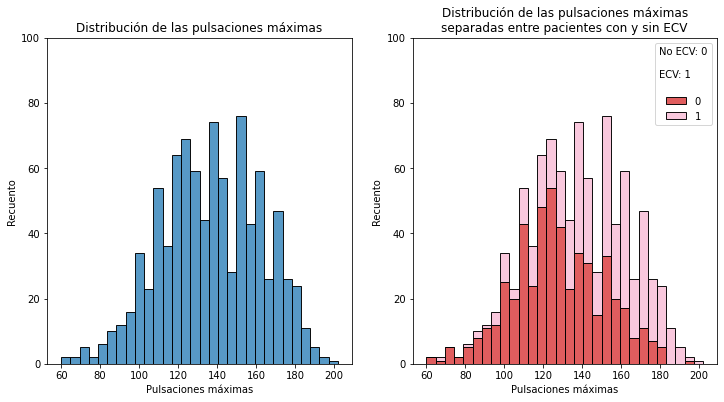

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=data, x="MaxHR", bins=30, ax=ax[0])
ax[0].set_ylim(0, 100)
ax[0].set_title("Distribución de las pulsaciones máximas")

sns.histplot(data=data, x="MaxHR", hue="HeartDisease", bins=30, ax=ax[1], multiple="stack", palette="tab20_r")
ax[1].set_ylim(0, 100)
ax[1].set_title("Distribución de las pulsaciones máximas\nseparadas entre pacientes con y sin ECV")
ax[1].legend(title='No ECV: 0\n\nECV: 1\n', labels=[0, 1])

for n in [0, 1]:
    ax[n].set_xlabel("Pulsaciones máximas")
    ax[n].set_ylabel("Recuento")

La distribución de las pulsaciones máximas, tiene su pico alrerdedor de 160, aunque la mayoría de valores se encuentran entre 120 y 170.

Se ve claramente que a mayores pulsaciones máximas, menor es el riesgo de sufrir una ECV.

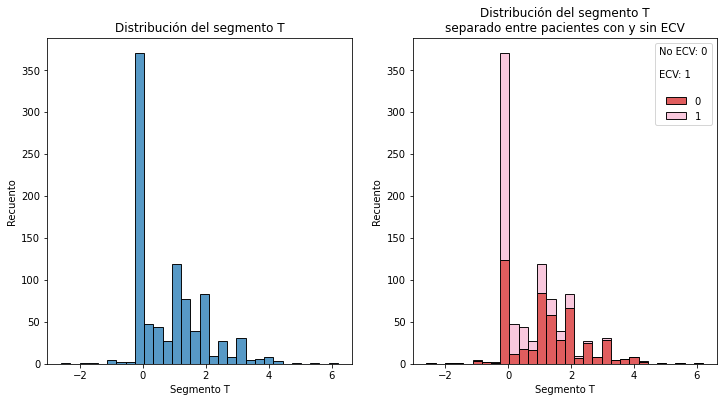

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=data, x="Oldpeak", bins=30, ax=ax[0])
ax[0].set_title("Distribución del segmento T")

sns.histplot(data=data, x="Oldpeak", hue="HeartDisease", bins=30, ax=ax[1], multiple="stack", palette="tab20_r")
ax[1].set_title("Distribución del segmento T\nseparado entre pacientes con y sin ECV")
ax[1].legend(title='No ECV: 0\n\nECV: 1\n', labels=[0, 1])

for n in [0, 1]:
    ax[n].set_xlabel("Segmento T")
    ax[n].set_ylabel("Recuento")

La distribución del segmento T, se encuentra mayoritáriamente concentrada en el 0, que es su valor normal, y podemos ver que a medida que se aleja de éste valor, aumentan drásticamente los casos de ECV.

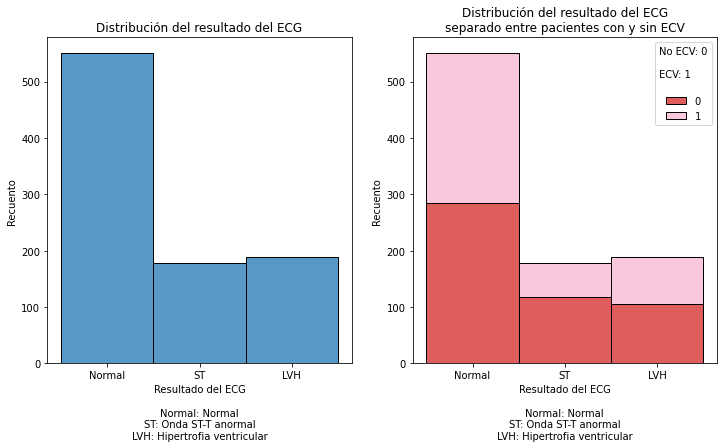

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=data, x="RestingECG", bins=30, ax=ax[0])
ax[0].set_title("Distribución del resultado del ECG")

sns.histplot(data=data, x="RestingECG", hue="HeartDisease", bins=30, ax=ax[1], multiple="stack", palette="tab20_r")
ax[1].set_title("Distribución del resultado del ECG\nseparado entre pacientes con y sin ECV")
ax[1].legend(title='No ECV: 0\n\nECV: 1\n', labels=[0, 1])

for n in [0, 1]:
    ax[n].set_xlabel("Resultado del ECG\n\n"+
                    "Normal: Normal\nST: Onda ST-T anormal\nLVH: Hipertrofia ventricular")
    ax[n].set_ylabel("Recuento")

La mayor parte de los pacientes observados mostraron un ECG normal, sin embargo, vemos que cuando el ECG sale de los valores normales, aumenta ligeramente el riesgo de ECV.

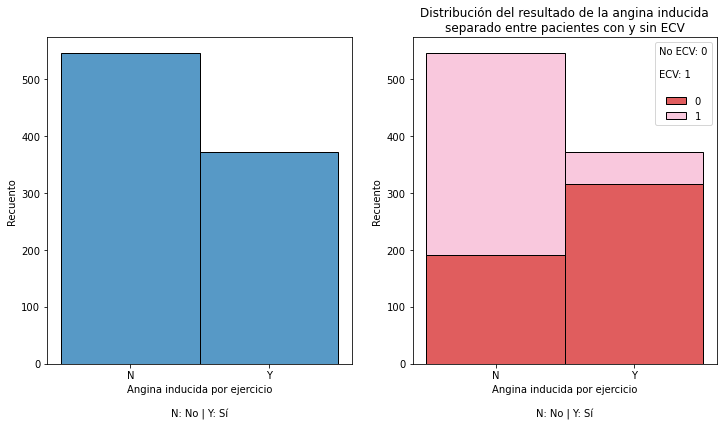

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=data, x="ExerciseAngina", bins=30, ax=ax[0])
ax[1].set_title("Distribución del resultado de la angina inducida")

sns.histplot(data=data, x="ExerciseAngina", hue="HeartDisease", bins=30, ax=ax[1], multiple="stack", palette="tab20_r")
ax[1].set_title("Distribución del resultado de la angina inducida\nseparado entre pacientes con y sin ECV")
ax[1].legend(title='No ECV: 0\n\nECV: 1\n', labels=[0, 1])

for n in [0, 1]:
    ax[n].set_xlabel("Angina inducida por ejercicio\n\n"+
                    "N: No | Y: Sí")
    ax[n].set_ylabel("Recuento")

Aunque observamos que hay más casos en los que no hay una angina inducida, hay más casos de ECV que han presentado una angina inducida que casos que no lo han hecho.

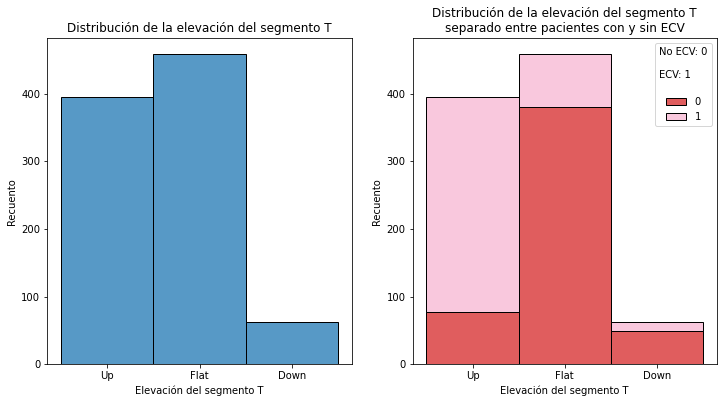

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=data, x="ST_Slope", bins=30, ax=ax[0])
ax[0].set_title("Distribución de la elevación del segmento T")

sns.histplot(data=data, x="ST_Slope", hue="HeartDisease", bins=30, ax=ax[1], multiple="stack", palette="tab20_r")
ax[1].set_title("Distribución de la elevación del segmento T\nseparado entre pacientes con y sin ECV")
ax[1].legend(title='No ECV: 0\n\nECV: 1\n', labels=[0, 1])

for n in [0, 1]:
    ax[n].set_xlabel("Elevación del segmento T")
    ax[n].set_ylabel("Recuento")

La mayor parte de las observaciones muestran una elevación del segmento T hacia arriba o plana, y los casos de más riesgo de ECV son tanto la plana como hacia abajo.

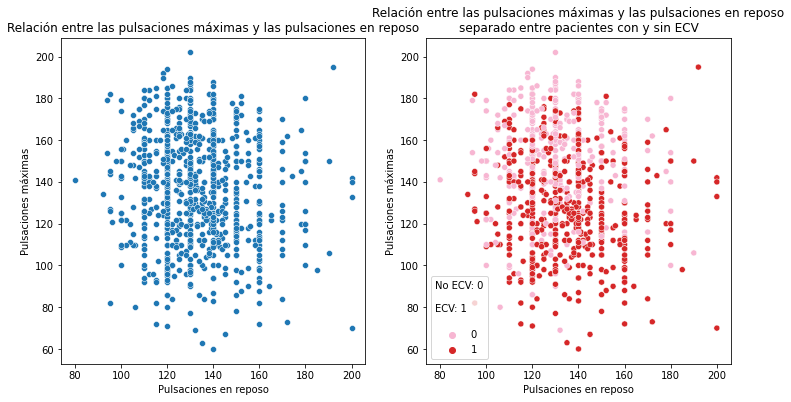

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(data=data, x="RestingBP", y="MaxHR", ax=ax[0])
ax[0].set_title("Relación entre las pulsaciones máximas y las pulsaciones en reposo")

sns.scatterplot(data=data, x="RestingBP", y="MaxHR", hue="HeartDisease", ax=ax[1], palette="tab20_r")
ax[1].set_title("Relación entre las pulsaciones máximas y las pulsaciones en reposo\nseparado entre pacientes con y sin ECV")
ax[1].legend(title='No ECV: 0\n\nECV: 1\n')

for n in [0, 1]:
    ax[n].set_xlabel("Pulsaciones en reposo")
    ax[n].set_ylabel("Pulsaciones máximas")

Text(17.67500000000001, 0.5, 'Pulsaciones máximas')

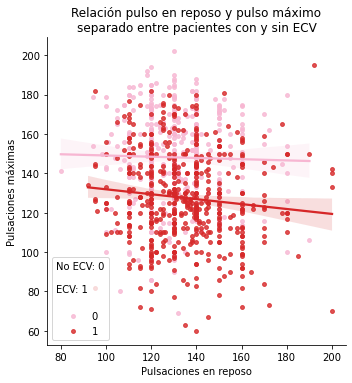

In [49]:
sns.lmplot(data=data, x="RestingBP", y="MaxHR", hue="HeartDisease", palette="tab20_r", scatter_kws={"s": 15}, legend=False)
plt.title("Relación pulso en reposo y pulso máximo\nseparado entre pacientes con y sin ECV")
plt.legend(title='No ECV: 0\n\nECV: 1\n')
plt.xlabel("Pulsaciones en reposo")
plt.ylabel("Pulsaciones máximas")

Aquí vemos cómo se relacionan las variables pulso máximo y pulso en reposo, y no parece que tengan un gran impacto la una con la otra. Al fijarmos en la separación entre casos con y sin ECV, vemos que a mayores pulsaciones en reposo y a menores pulsaciones máximas, mayor es el riesgo de tener alguna ECV.

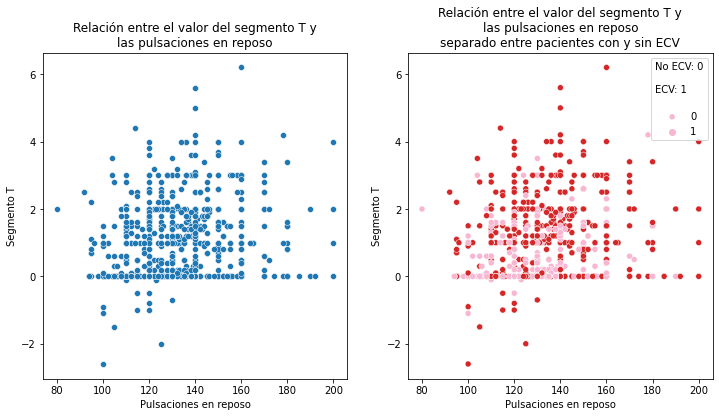

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(data=data, x="RestingBP", y="Oldpeak", ax=ax[0])
ax[0].set_title("Relación entre el valor del segmento T y\nlas pulsaciones en reposo")

sns.scatterplot(data=data, x="RestingBP", y="Oldpeak", hue="HeartDisease", ax=ax[1], palette="tab20_r")
ax[1].set_title("Relación entre el valor del segmento T y\nlas pulsaciones en reposo\nseparado entre pacientes con y sin ECV")
ax[1].legend(title='No ECV: 0\n\nECV: 1\n', labels=[0, 1])

for n in [0, 1]:
    ax[n].set_xlabel("Pulsaciones en reposo")
    ax[n].set_ylabel("Segmento T")

No se aprecia una relación entre estas dos variables.

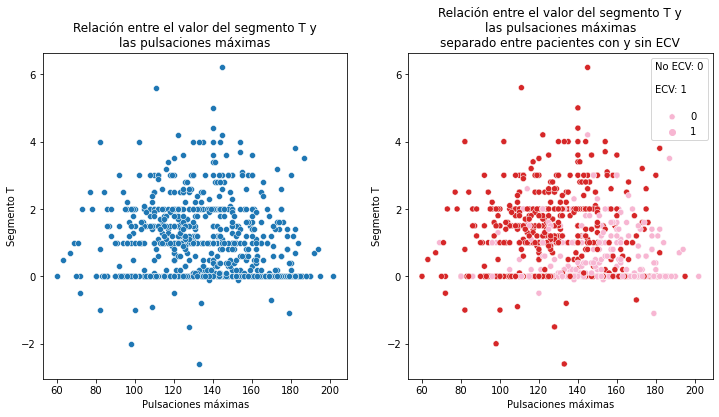

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(data=data, x="MaxHR", y="Oldpeak", ax=ax[0])
ax[0].set_title("Relación entre el valor del segmento T y\nlas pulsaciones máximas")

sns.scatterplot(data=data, x="MaxHR", y="Oldpeak", hue="HeartDisease", ax=ax[1], palette="tab20_r")
ax[1].set_title("Relación entre el valor del segmento T y\nlas pulsaciones máximas\nseparado entre pacientes con y sin ECV")
ax[1].legend(title='No ECV: 0\n\nECV: 1\n', labels=[0, 1])

for n in [0, 1]:
    ax[n].set_xlabel("Pulsaciones máximas")
    ax[n].set_ylabel("Segmento T")

Aquí podemos ver que a medida que aumentan las pulsaciones máximas, más se acerca el segmento T a 0, con lo cual se reduce el riesgo de tener alguna ECV.

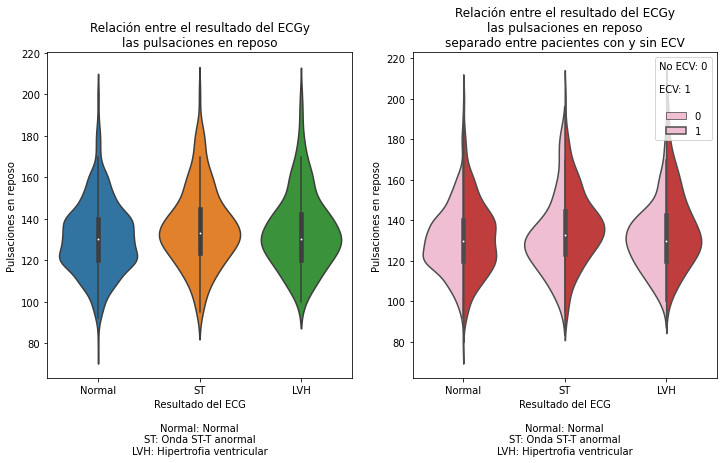

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.violinplot(data=data, x="RestingECG", y="RestingBP", ax=ax[0])
ax[0].set_title("Relación entre el resultado del ECGy\nlas pulsaciones en reposo")

sns.violinplot(data=data, x="RestingECG", y="RestingBP", hue="HeartDisease", split=True, ax=ax[1], palette="tab20_r")
ax[1].set_title("Relación entre el resultado del ECGy\nlas pulsaciones en reposo\nseparado entre pacientes con y sin ECV")
ax[1].legend(title='No ECV: 0\n\nECV: 1\n', labels=[0, 1])

for n in [0, 1]:
    ax[n].set_xlabel("Resultado del ECG\n\n"+
                    "Normal: Normal\nST: Onda ST-T anormal\nLVH: Hipertrofia ventricular")
    ax[n].set_ylabel("Pulsaciones en reposo")

En cuanto a la comparativa entre el resultado del ECG y las pulsaciones en reposo, no se puede ver ninguna información interesante más alla de que para un ECG normal, las pulsaciones en reposo son ligeramente más bajas.

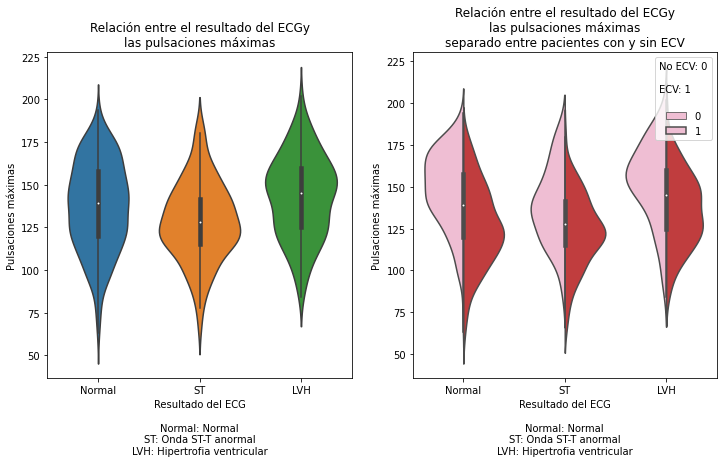

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.violinplot(data=data, x="RestingECG", y="MaxHR", ax=ax[0])
ax[0].set_title("Relación entre el resultado del ECGy\nlas pulsaciones máximas")

sns.violinplot(data=data, x="RestingECG", y="MaxHR", hue="HeartDisease", split=True, ax=ax[1], palette="tab20_r")
ax[1].set_title("Relación entre el resultado del ECGy\nlas pulsaciones máximas\nseparado entre pacientes con y sin ECV")
ax[1].legend(title='No ECV: 0\n\nECV: 1\n', labels=[0, 1])

for n in [0, 1]:
    ax[n].set_xlabel("Resultado del ECG\n\n"+
                    "Normal: Normal\nST: Onda ST-T anormal\nLVH: Hipertrofia ventricular")
    ax[n].set_ylabel("Pulsaciones máximas")

En esta comparativa, podemos observar que para un electrocardiograma normal, las pulsaciones máximas son ligeramente superiores a cuando existe una onda ST-T anormal, pero aún son más elevadas cuando hay una hipertrofia ventricular. Sin embargo, cuando existe una hipertrofia ventricular, aun teniendo unas pulsaciones elevadas, sigue existiendo riesgo a tener una ECV.

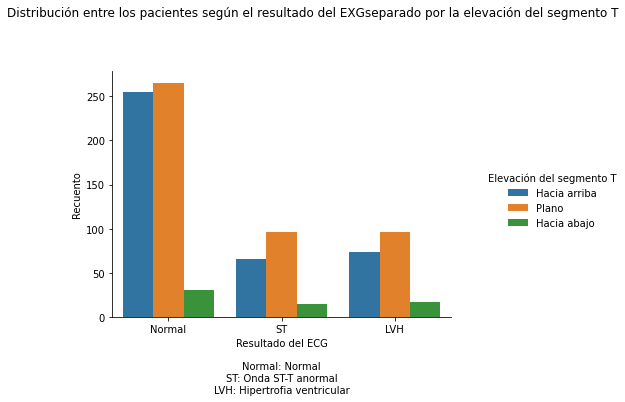

In [54]:
g = sns.catplot(data=data, x="RestingECG", kind="count", hue="ST_Slope")
g.set_ylabels("Recuento")
g.set_xlabels("Resultado del ECG\n\n"+
                    "Normal: Normal\nST: Onda ST-T anormal\nLVH: Hipertrofia ventricular")
plt.suptitle("Distribución entre los pacientes según el resultado del EXG"+
                "separado por la elevación del segmento T\n\n")
g.fig.subplots_adjust(top=0.8)
g.legend.remove()
g.add_legend(title="Elevación del segmento T", **{"labels":["Hacia arriba", "Plano", "Hacia abajo"]})

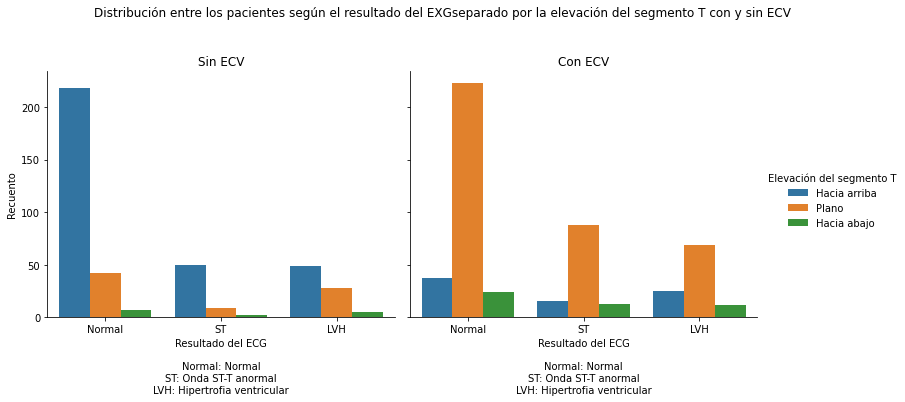

In [55]:
g = sns.catplot(data=data, x="RestingECG", kind="count", hue="ST_Slope", col="HeartDisease")
axes = g.axes.flatten()
g.set_ylabels("Recuento")
g.set_xlabels("Resultado del ECG\n\n"+
                    "Normal: Normal\nST: Onda ST-T anormal\nLVH: Hipertrofia ventricular")

plt.suptitle("Distribución entre los pacientes según el resultado del EXG"+
                "separado por la elevación del segmento T con y sin ECV\n\n")
g.fig.subplots_adjust(top=0.8)
axes[0].set_title("Sin ECV")
axes[1].set_title("Con ECV")
g.legend.remove()
g.add_legend(title="Elevación del segmento T", **{"labels":["Hacia arriba", "Plano", "Hacia abajo"]})

En este caso no vemos que haya relación entre el resultado del ECG y la elevación del segmento T. Sin embargo, sí que vemos que para una elevación del segmento T plana, hay muchas probabilidades de tener una ECV, aunque el resultado del ECG sea normal.

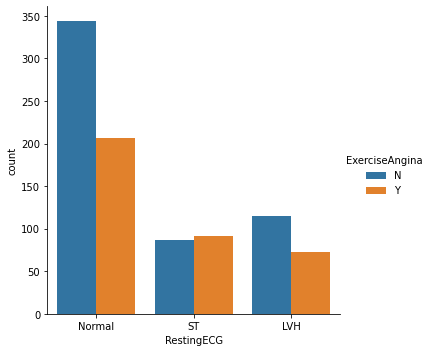

In [56]:
g = sns.catplot(data=data, x="RestingECG", kind="count", hue="ExerciseAngina")


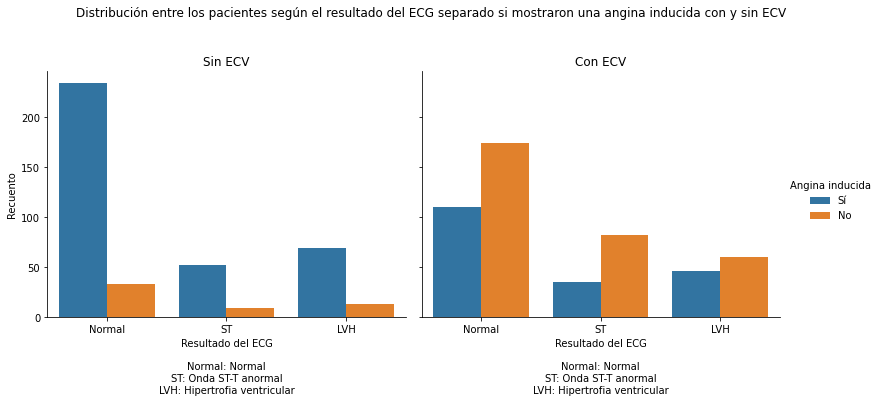

In [57]:
g = sns.catplot(data=data, x="RestingECG", kind="count", hue="ExerciseAngina", col="HeartDisease")
axes = g.axes.flatten()
g.set_ylabels("Recuento")
g.set_xlabels("Resultado del ECG\n\n"+
                    "Normal: Normal\nST: Onda ST-T anormal\nLVH: Hipertrofia ventricular")

plt.suptitle("Distribución entre los pacientes según el resultado del ECG "+
                "separado si mostraron una angina inducida con y sin ECV\n\n")
g.fig.subplots_adjust(top=0.8)
axes[0].set_title("Sin ECV")
axes[1].set_title("Con ECV")
g.legend.remove()
g.add_legend(title="Angina inducida", **{"labels":["Sí", "No"]})

Aquí podemos ver que para un ECG con una onda ST-T anormal, hay muchas probabilidades de tener una angina inducida, y esta anggina inducida es un fuerte indicador de las ECV. La relación entre un ECG normal y con hipertrofia ventricular y la angina inducida, no parece ser clara.

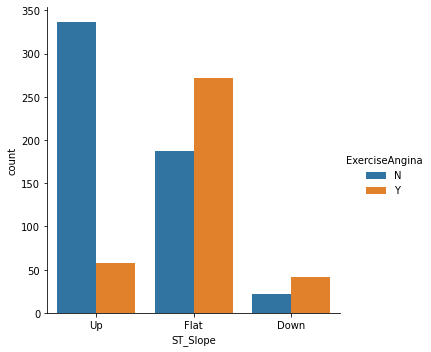

In [58]:
g = sns.catplot(data=data, x="ST_Slope", kind="count", hue="ExerciseAngina")

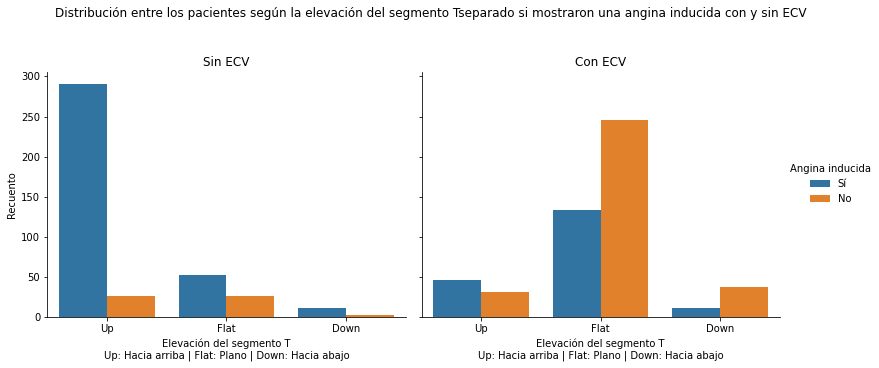

In [59]:
g = sns.catplot(data=data, x="ST_Slope", kind="count", hue="ExerciseAngina", col="HeartDisease")
axes = g.axes.flatten()
g.set_ylabels("Recuento")
g.set_xlabels("Elevación del segmento T\n"+
              "Up: Hacia arriba | Flat: Plano | Down: Hacia abajo")

plt.suptitle("Distribución entre los pacientes según la elevación del segmento T"+
                "separado si mostraron una angina inducida con y sin ECV\n\n")
g.fig.subplots_adjust(top=0.8)
axes[0].set_title("Sin ECV")
axes[1].set_title("Con ECV")
g.legend.remove()
g.add_legend(title="Angina inducida", **{"labels":["Sí", "No"]})

Para la elevación del segmento T en comparación con la angina inducida, vemos que cuando la elevación es plana o hacia abajo, hay muchísimas más probabilidades de que se muestre una angina inducida, y ya hemos comentado anteriormente que cuando hay angina inducida, es muy probable que el paciente tenga una ECV.

### ***CONCLUSIONES RESULTADOS DEL ECG***
En este sector, hemos analizado y comparado distintas variables derivadas del resultado del ECG, y hemos visto varias cosas que nos pueden aportar información.

Podemos ver que en cuanto a las pulsaciones, cuando las pulsaciones en reposo son elevadas o cuando las pulsaciones máximas son bajas, aumenta la probabilidad de tener una ECV. Aún así, no observamos una clara relación entre estas dos variables. Para el segmento T, cuando éste se aleja de 0, o la elevación es plana o hacia abajo, aumenta la probabilidad de mostrar una ECV. Además, vemos que cuando las pulsaciones máximas son altas, el segmento T tiende a estar cerca de 0. También hemos visto que, cuando el resultado del ECG muestra una onda ST-T anormal, hay más porcentaje de observaciones con ECV que con el resto de resultados, y la pulsación máxima se reduce. Cuando el ECG muestra una hipertrofia, la pulsación máxima aumenta. Además, vemos que cuando hay este tipo de resultados, es más probable mostrar una angina inducida. Continuando con la angina inducida, cuando ésta se produce, las probabilidades de observar una ECV aumenta drásticamente, y ésta se muestra también cuando la elevación del segmento T es plana o hacia abajo.

## Mapa de correlación<a id="237"></a>

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'Edad'),
  Text(1.5, 0, 'Pulsaciones_en_reposo'),
  Text(2.5, 0, 'Colesterol'),
  Text(3.5, 0, 'Nivel_de_azúcar'),
  Text(4.5, 0, 'Pulsaciones_máximas'),
  Text(5.5, 0, 'Segmento_T'),
  Text(6.5, 0, 'ECV')])

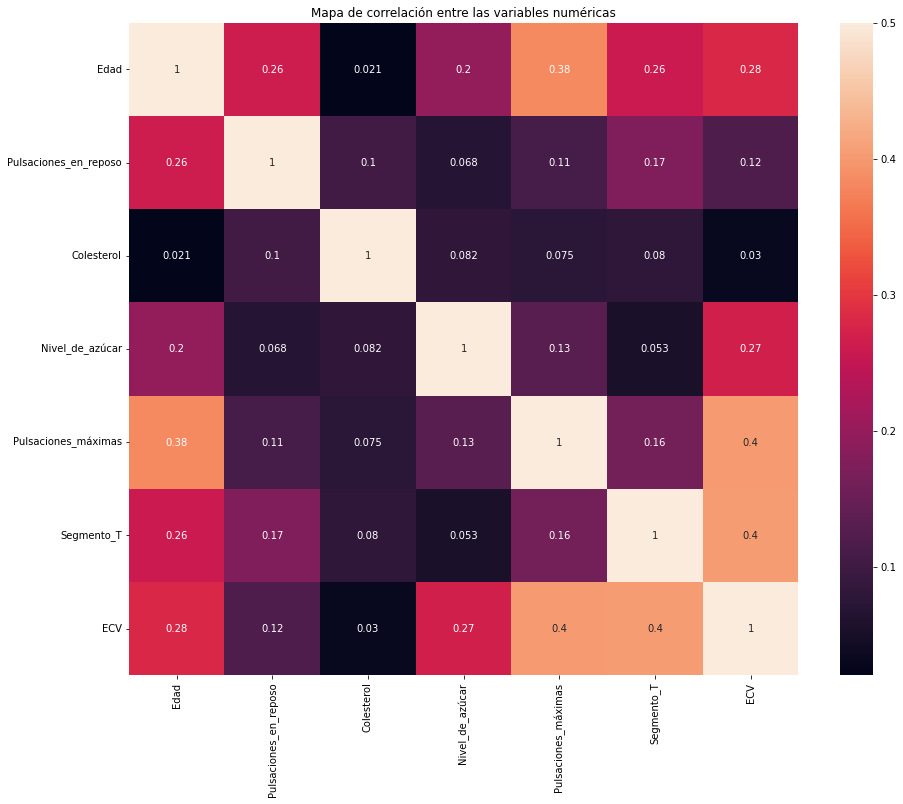

In [60]:
corrmap = data.corr().abs()
fig, ax = plt.subplots(figsize=(15,12))
labels = ["Edad", "Pulsaciones_en_reposo", "Colesterol", "Nivel_de_azúcar", "Pulsaciones_máximas", "Segmento_T", "ECV"]
sns.heatmap(corrmap, annot=True, vmax=0.5, ax=ax, xticklabels=labels, yticklabels=labels)
plt.title("Mapa de correlación entre las variables numéricas")
plt.xticks(rotation=90)

Al centrarnos en el mapa de correlaciones, vemos que hay relaciones entre variables que hemos comentado anteriormente.

En cuanto a las principales causas de ECV, vemos que son el valor del segmento T, las pulsaciones máximas y, en menor medida, la edad y el nivel de azúcar en sangre.

También vemos como están fuertemente correlacionadas la edad con las pulsacines en reposo, con las pulsaciones máximas y con el valor del Segmento-T.

### ***CONCLUSIONES FINALES DEL EDA***<a id="238"></a>

Al estudiar el impacto de la edad tanto en el efecto que tiene en las ECV como al compararla con otras variables, hemos visto que claramente, a mayor edad, mayor riesgo de ECV y mayor riesgo de que aumenten los indicadores de riesgo para las ECV.

En cuanto a las comparativas entre sexos, hemos visto que los hombres tienen mayor riesgo a sufrir una ECV que las mujeres, sobretodo si nos centramos en las variables del segmento T, el axucar en sangre, las pulsaciones máximas o la angina inducida. Sin embargo, para las mujeres, en cuanto aumenta el pulso mínimo en reposo o el colesterol, su riesgo a sufrir una ECV aumenta de forma muy considerable.

Si nos fijamos en el tipo de dolor pectoral, podemos ver que no tiene muchai influencia en el riesgo de sufrir una ECV,, aunque no podemos sacar conclusiones seguras, debido a que la mayoría de las observaciones no presentan dolor pectoral.

Donde sí hemos visto un impacto ha sido en la relación entre el segmento T y el dolor pectoral, dado que mientras que cuando no hay un dolor típico de angina, el tener el segmento T cercano a 0 reduce drásticamente la probabilidad de tener una ECV, cuando existe un dolor típico de angina, ésta varianble deja de ser relevante y se puede sufrir o no una ECV independientemente del valor del segmento T.

Viendo los resultados de las analíticas de sangre, hemos podido ver que tanto el colesterol como el nivel de azúcar en sangre tienen un elevado impacto en el riesgo de sufrir una ECV, aunque no se observa una gran correlación ellas.

En el sector de los resultados del electrocardiograma, hemos analizado y comparado distintas variables derivadas del resultado del ECG, y hemos visto varias cosas que nos pueden aportar información.

Hemos observado que, en cuanto a las pulsaciones, cuando las pulsaciones en reposo son elevadas o cuando las pulsaciones máximas son bajas, aumenta la probabilidad de tener una ECV. Aún así, no observamos una clara relación entre estas dos variables. Para el segmento T, cuando éste se aleja de 0, o la elevación es plana o hacia abajo, aumenta la probabilidad de mostrar una ECV. Además, vemos que cuando las pulsaciones máximas son altas, el segmento T tiende a estar cerca de 0. También hemos visto que, cuando el resultado del ECG muestra una onda ST-T anormal, hay más porcentaje de observaciones con ECV que con el resto de resultados, y la pulsación máxima se reduce. Cuando el ECG muestra una hipertrofia, la pulsación máxima aumenta. Además, vemos que cuando hay este tipo de resultados, es más probable mostrar una angina inducida. Continuando con la angina inducida, cuando ésta se produce, las probabilidades de observar una ECV aumenta drásticamente, y ésta se muestra también cuando la elevación del segmento T es plana o hacia abajo.

# **Preparación de los datos:**<a id="3"></a>

En esta fase, vamos a realizar una limpieza de los datos. Además, los acomodaremos para que sean una buena entrada para el modelado de forma que podamos obtener unos buenos resultados. Para ello, realizaremos tareas de normalización, discretización, *feature engineering* como PCA o SVD, y todo aquello que sea necesario para poder tener la máxima precisión en el modelado.

## Discretización de los datos<a id="31"></a>

AgeDisc

Vamos a discretizar la variable edad siguiendo el siguiente criterio: 0: <45 | 1: >=45 & <55 | 2: >=55 & <70 | 3: >70

In [61]:
data["AgeDisc"] = data["Age"]
data.loc[data["Age"]<45, "AgeDisc"] = 0
data.loc[(data["Age"]>=45) & (data["Age"]<55), "AgeDisc"] = 1
data.loc[(data["Age"]>=55) & (data["Age"]<70), "AgeDisc"] = 2
data.loc[data["Age"]>=70, "AgeDisc"] = 3

<AxesSubplot:xlabel='AgeDisc', ylabel='Count'>

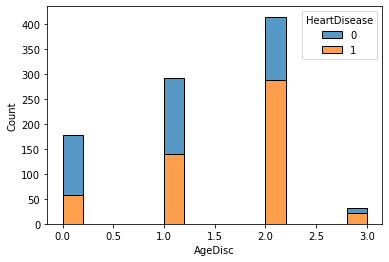

In [62]:
sns.histplot(data=data, x="AgeDisc", hue="HeartDisease", multiple="stack")

Discretizamos el segmento T siguiendo el criterio en el que consideraremos que si está encima de -1 y por debajo de 0.5, lo consideraremos normal (0), y para el resto de valores, lo consideraremos anormal (1).

In [63]:
data["OldpeakDisc"] = data["Oldpeak"]
data.loc[(data["Oldpeak"]>-1) & (data["Oldpeak"]<0.5), "OldpeakDisc"] = 0
data.loc[data["Oldpeak"]<=-1, "OldpeakDisc"] = 1
data.loc[data["Oldpeak"]>=0.5, "OldpeakDisc"] = 1

<AxesSubplot:xlabel='OldpeakDisc', ylabel='Count'>

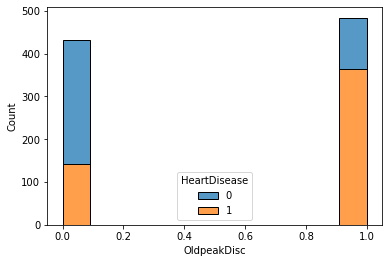

In [64]:
sns.histplot(data=data, x="OldpeakDisc", hue="HeartDisease", multiple="stack")

Discretizamos las pulsaciones máximas, y asignamos un 0 si están por debajo o son iguales a 130, y un 1 si están por encima.

In [65]:
data["MaxHRDisc"] = data["MaxHR"]
data.loc[data["MaxHR"]<=130, "MaxHRDisc"] = 0
data.loc[data["MaxHR"]>130, "MaxHRDisc"] = 1

<AxesSubplot:xlabel='MaxHRDisc', ylabel='Count'>

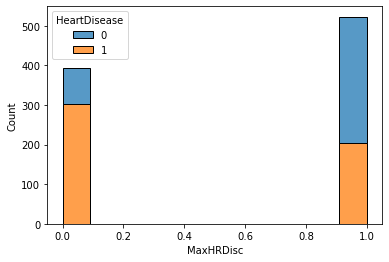

In [66]:
sns.histplot(data=data, x="MaxHRDisc", hue="HeartDisease", multiple="stack")

## Conversión de datos discretos<a id="32"></a>

En este apartado, asignaremos valores numéricos a todas las variables categóricas que tenían valores de tipo texto.

In [67]:
data["ChestPainTypeNum"] = data["ChestPainType"]
data.loc[data["ChestPainType"]=="ATA", "ChestPainTypeNum"] = 3
data.loc[data["ChestPainType"]=="NAP", "ChestPainTypeNum"] = 1
data.loc[data["ChestPainType"]=="ASY", "ChestPainTypeNum"] = 0
data.loc[data["ChestPainType"]=="TA", "ChestPainTypeNum"] = 2
data["ChestPainTypeNum"] = data["ChestPainTypeNum"].astype('int')

In [68]:
data["SexNum"] = data["Sex"]
data.loc[data["Sex"]=="M", "SexNum"] = 0
data.loc[data["Sex"]=="F", "SexNum"] = 1
data["SexNum"] = data["SexNum"].astype('int')

In [69]:
data["RestingECGNum"] = data["RestingECG"]
data.loc[data["RestingECG"]=="Normal", "RestingECGNum"] = 0
data.loc[data["RestingECG"]=="ST", "RestingECGNum"] = 1
data.loc[data["RestingECG"]=="LVH", "RestingECGNum"] = 2

data["RestingECGNum"] = data["RestingECGNum"].astype('int')

In [70]:
data["ExerciseAnginaNum"] = data["ExerciseAngina"]
data.loc[data["ExerciseAngina"]=="N", "ExerciseAnginaNum"] = 0
data.loc[data["ExerciseAngina"]=="Y", "ExerciseAnginaNum"] = 1
data["ExerciseAnginaNum"] = data["ExerciseAnginaNum"].astype('int')

In [71]:
data["ST_SlopeNum"] = data["ST_Slope"]
data.loc[data["ST_Slope"]=="Up", "ST_SlopeNum"] = 0
data.loc[data["ST_Slope"]=="Flat", "ST_SlopeNum"] = 1
data.loc[data["ST_Slope"]=="Down", "ST_SlopeNum"] = 2

data["ST_SlopeNum"] = data["ST_SlopeNum"].astype('int')

Volvemos a analizar cómo se correlacionan las variables ahora que tenemos variables discretizadas  que las variables categóricas se pueden calcular.

<AxesSubplot:>

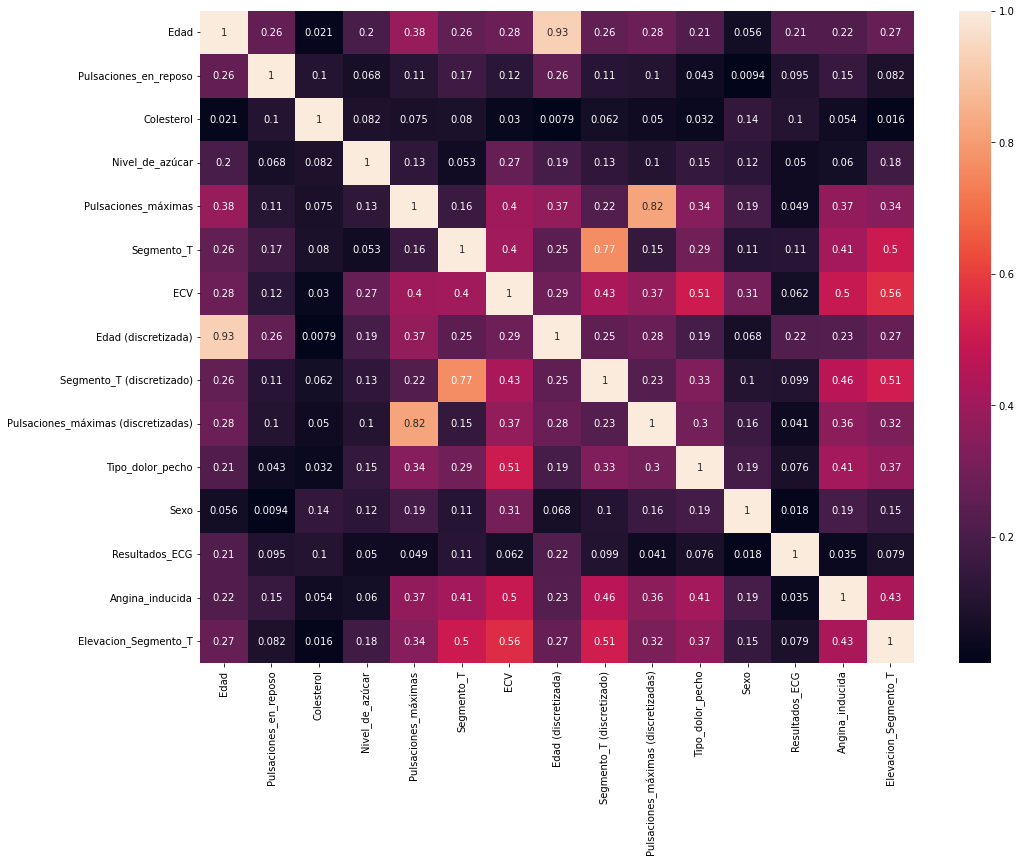

In [72]:
plt.subplots(figsize=(16,12))
cormap = data.corr().abs()
labels = ["Edad", "Pulsaciones_en_reposo", "Colesterol", "Nivel_de_azúcar", "Pulsaciones_máximas", "Segmento_T", 
          "ECV", "Edad (discretizada)", "Segmento_T (discretizado)", "Pulsaciones_máximas (discretizadas)", 
          "Tipo_dolor_pecho", "Sexo", "Resultados_ECG", "Angina_inducida", "Elevacion_Segmento_T"]

sns.heatmap(cormap, annot=True, xticklabels=labels, yticklabels=labels)

Vemos que al discretizar la edad y el segmento T, aumenta su correlación con la variable ECV, aunque no es así con las pulsaciones máximas.

Podemos cer también que la mayoría de las variables categóricas tienen una elevada correlación con las ECV, de modo que será interesante tenerlas de forma numérica para poder introducirlas en los modelos.

## Normalización y escalado de los datos<a id="33"></a>


Ahora normalizamos y escalamos los datos para que sean una entrada de mayor calidad y de este modo le podamos facilitar los cálculos al modelo.

Colesterol:

<AxesSubplot:xlabel='CholesterolNorm', ylabel='Count'>

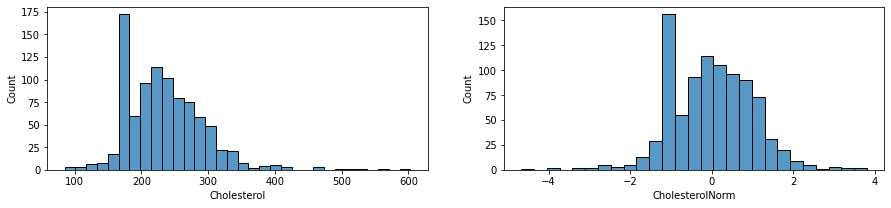

In [73]:
data["CholesterolNorm"] = data["Cholesterol"]

data["CholesterolNorm"] = stats.boxcox(data["CholesterolNorm"])[0]

data["CholesterolNorm"] = StandardScaler().fit_transform(data["CholesterolNorm"].array.reshape(-1, 1))


fig, ax=plt.subplots(1, 2, figsize=(15, 3))


sns.histplot(data["Cholesterol"], ax=ax[0])
sns.histplot(data["CholesterolNorm"], ax=ax[1])

Segmento T:

<AxesSubplot:xlabel='OldpeakNorm', ylabel='Count'>

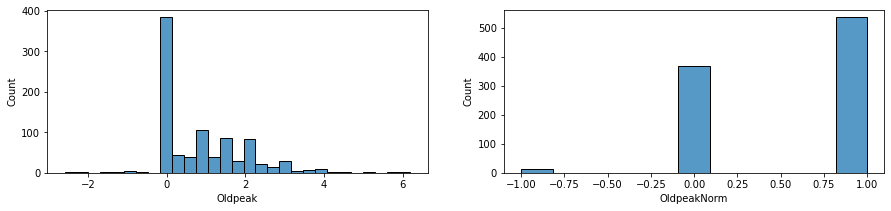

In [74]:
data["OldpeakNorm"] = data["Oldpeak"]

data["OldpeakNorm"].array.reshape(-1, 1)

data["OldpeakNorm"] = normalize(data["OldpeakNorm"].array.reshape(-1, 1))

fig, ax=plt.subplots(1, 2, figsize=(15, 3))


sns.histplot(data["Oldpeak"], ax=ax[0])
sns.histplot(data["OldpeakNorm"], ax=ax[1])

Pulsaciones máximas:

<AxesSubplot:xlabel='MaxHRNorm', ylabel='Count'>

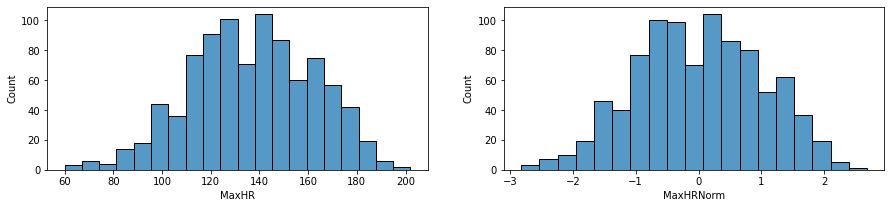

In [75]:
data["MaxHRNorm"] = data["MaxHR"]


#data["MaxHRNorm"] = normalize(data["MaxHRNorm"].array.reshape(-1, 1), norm='l2')
data["MaxHRNorm"] = stats.boxcox(data["MaxHRNorm"])[0]

data["MaxHRNorm"] = StandardScaler().fit_transform(data["MaxHRNorm"].array.reshape(-1, 1))

fig, ax=plt.subplots(1, 2, figsize=(15, 3))


sns.histplot(data["MaxHR"], ax=ax[0])
sns.histplot(data["MaxHRNorm"], ax=ax[1])

Edad:

<AxesSubplot:xlabel='AgeNorm', ylabel='Count'>

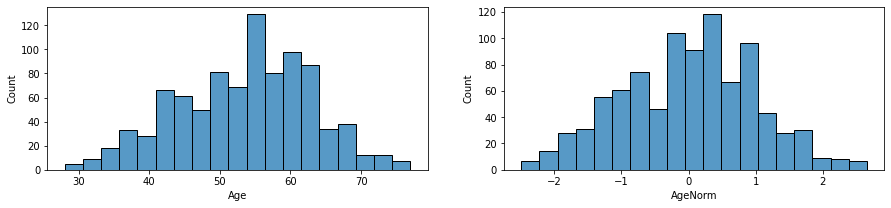

In [76]:
data["AgeNorm"] = data["Age"]


#data["MaxHRNorm"] = normalize(data["MaxHRNorm"].array.reshape(-1, 1), norm='l2')
data["AgeNorm"] = stats.boxcox(data["AgeNorm"])[0]

data["AgeNorm"] = StandardScaler().fit_transform(data["AgeNorm"].array.reshape(-1, 1))

fig, ax=plt.subplots(1, 2, figsize=(15, 3))


sns.histplot(data["Age"], ax=ax[0])
sns.histplot(data["AgeNorm"], ax=ax[1])

Pulsaciones en reposo:

<AxesSubplot:xlabel='RestingBPNorm', ylabel='Count'>

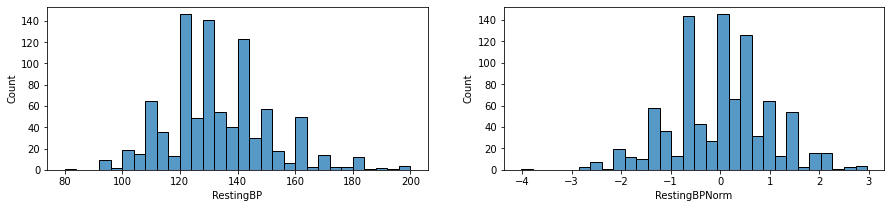

In [77]:
data["RestingBPNorm"] = data["RestingBP"]


#data["MaxHRNorm"] = normalize(data["MaxHRNorm"].array.reshape(-1, 1), norm='l2')
data["RestingBPNorm"] = stats.boxcox(data["RestingBPNorm"])[0]

data["RestingBPNorm"] = StandardScaler().fit_transform(data["RestingBPNorm"].array.reshape(-1, 1))

fig, ax=plt.subplots(1, 2, figsize=(15, 3))


sns.histplot(data["RestingBP"], ax=ax[0])
sns.histplot(data["RestingBPNorm"], ax=ax[1])

Volvemos a analizar las correlaciones para ver si hemos mejorado tras la normalización y el escalado:

<AxesSubplot:>

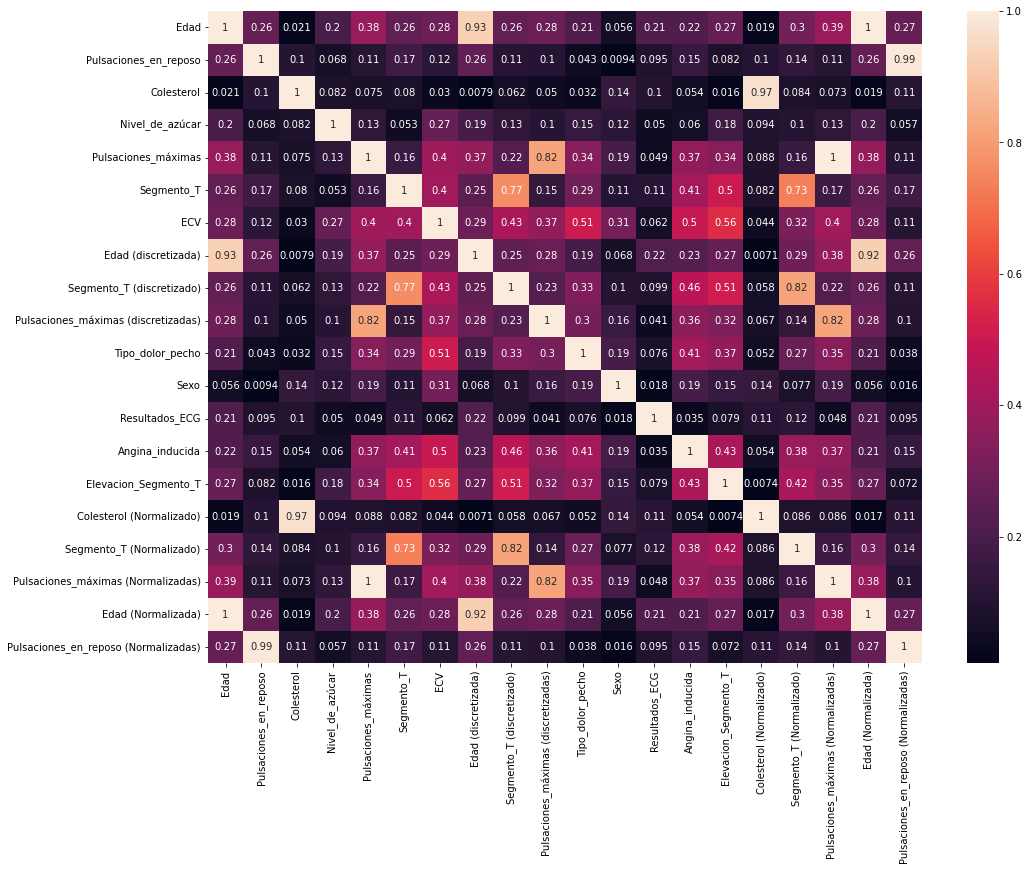

In [78]:
plt.subplots(figsize=(16,12))
cormap = data.corr().abs()
labels = ["Edad", "Pulsaciones_en_reposo", "Colesterol", "Nivel_de_azúcar", "Pulsaciones_máximas", "Segmento_T", 
          "ECV", "Edad (discretizada)", "Segmento_T (discretizado)", "Pulsaciones_máximas (discretizadas)", 
          "Tipo_dolor_pecho", "Sexo", "Resultados_ECG", "Angina_inducida", "Elevacion_Segmento_T", "Colesterol (Normalizado)",
          "Segmento_T (Normalizado)", "Pulsaciones_máximas (Normalizadas)", "Edad (Normalizada)", "Pulsaciones_en_reposo (Normalizadas)"]

sns.heatmap(cormap, annot=True, xticklabels=labels, yticklabels=labels)

Aunque no se observa una gran mejora, sí que mejoramos la entrada del algoritmo, de modo que nos será útil mantener estas variables.

## PCA <a id="34"></a>

Creamos una función que nos sirva para hacer el PCA cambiando las variables que se tienen en cuenta.

In [79]:
def analisisPCA(feats, data):
    '''Función para realizar un análisis PCA eligiendo las variables a estudiar'''
    feats=feats
    X = data[feats]
    pca_pipe = make_pipeline(StandardScaler(), PCA())
    pca_pipe.fit(X)
    # Se extrae el modelo entrenado del pipeline
    modelo_pca = pca_pipe.named_steps['pca']

    comps = []
    for n in range(len(modelo_pca.components_)):
        comps.append("PC"+str(n+1))

    pca_ = pd.DataFrame(data = modelo_pca.components_, columns = feats, index=comps)

    print(pca_.round(2))
    sns.heatmap(pca_.T, annot=True, cmap='viridis')
    plt.title("Mapa de calor del impacto de cada componente")
    plt.show()
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
    ax.bar(x = np.arange(modelo_pca.n_components_) + 1, height = modelo_pca.explained_variance_ratio_)

    for x, y in zip(np.arange(len(feats)) + 1, modelo_pca.explained_variance_ratio_):
        label = round(y, 2)
        ax.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')

    ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
    ax.set_ylim(0, 1.1)
    ax.set_title('Porcentaje de varianza explicada por cada componente')
    ax.set_xlabel('Componente principal')
    ax.set_ylabel('% varianza explicada')
    plt.show()
    prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
   
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
    ax.plot(np.arange(len(feats)) + 1, prop_varianza_acum, marker = 'o')

    for x, y in zip(np.arange(len(feats)) + 1, prop_varianza_acum):
        label = round(y, 2)
        ax.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')

    ax.set_ylim(0, 1.1)
    ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
    ax.set_title('Porcentaje de varianza explicada acumulada')
    ax.set_xlabel('Componente principal')
    ax.set_ylabel('% varianza acumulada')

Variables iniciales numéricas sin tratar

      Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak
PC1  0.59       0.40         0.03       0.29  -0.48     0.41
PC2 -0.04       0.36         0.73      -0.42   0.27     0.28
PC3 -0.06       0.28         0.26       0.78   0.40    -0.28
PC4  0.02       0.74        -0.40      -0.32   0.04    -0.43
PC5 -0.20       0.16        -0.48       0.09   0.48     0.68
PC6  0.78      -0.24        -0.08      -0.15   0.54    -0.13


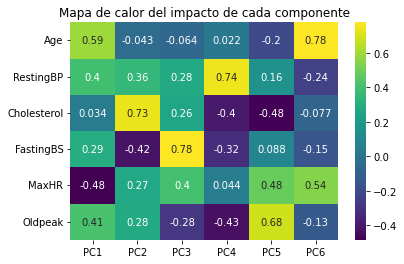

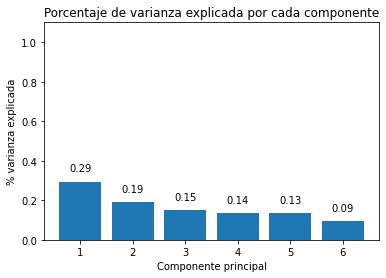

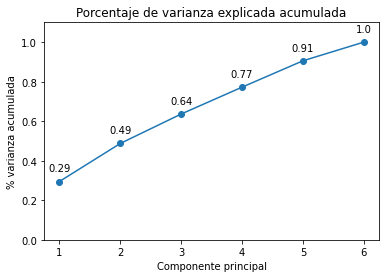

In [80]:
feats=["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]
analisisPCA(feats, data)

feats = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS',
        'MaxHR', 'Oldpeak', 
       'HeartDisease', 'AgeDisc', 'OldpeakDisc', 'MaxHRDisc',
       'ChestPainTypeNum', 'SexNum', 'RestingECGNum', 'ExerciseAnginaNum',
       'ST_SlopeNum', 'CholesterolNorm', 'OldpeakNorm', 'MaxHRNorm', 'AgeNorm',
       'RestingBPNorm']
analisisPCA(feats, data)

Hacemos el PCA ahora teniendo en cuenta las variables discretizadas.

     RestingBP  Cholesterol  FastingBS  AgeDisc  OldpeakDisc  MaxHRDisc
PC1       0.38         0.03       0.33     0.56         0.47      -0.46
PC2       0.42         0.79      -0.40     0.01         0.06       0.18
PC3       0.50        -0.07       0.56     0.09        -0.41       0.50
PC4      -0.47         0.44       0.56    -0.17         0.42       0.27
PC5      -0.22         0.41       0.25     0.06        -0.64      -0.55
PC6       0.41        -0.03       0.19    -0.80         0.15      -0.36


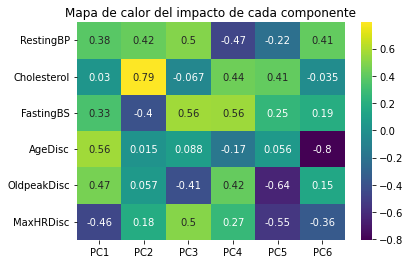

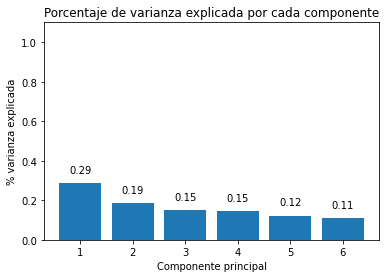

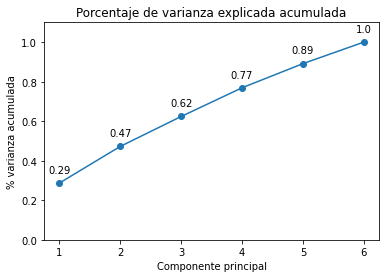

In [81]:
feats=["RestingBP", "Cholesterol", "FastingBS", 'AgeDisc', 'OldpeakDisc', 'MaxHRDisc']
analisisPCA(feats, data)

Ahora con las variables normalizadas.

     AgeNorm  MaxHRNorm  OldpeakDisc  CholesterolNorm
PC1    -0.62       0.60        -0.50             0.02
PC2    -0.03      -0.22        -0.28            -0.93
PC3    -0.36       0.32         0.82            -0.31
PC4    -0.70      -0.69         0.03             0.18


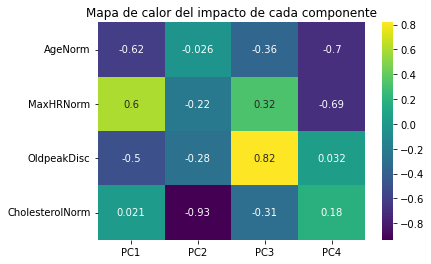

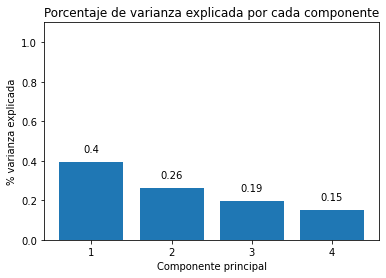

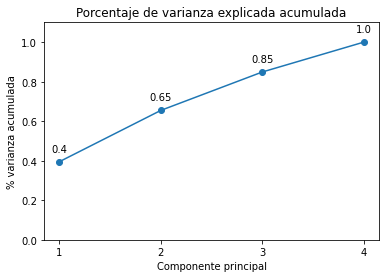

In [82]:
feats=["AgeNorm", "MaxHRNorm", "OldpeakDisc", "CholesterolNorm"]
analisisPCA(feats, data)

También con las variables categóricas.

     AgeDisc  SexNum  MaxHRNorm  OldpeakDisc  ChestPainTypeNum  \
PC1    -0.31    0.20       0.39        -0.41              0.39   
PC2     0.26    0.89       0.10         0.29              0.15   
PC3    -0.70    0.00       0.50         0.38             -0.15   
PC4     0.33   -0.41       0.32         0.38              0.64   
PC5    -0.39    0.08      -0.52        -0.07              0.62   
PC6    -0.24    0.01      -0.26        -0.12             -0.03   
PC7    -0.18   -0.02      -0.38         0.66             -0.04   

     ExerciseAnginaNum  ST_SlopeNum  
PC1              -0.44        -0.44  
PC2              -0.00         0.17  
PC3               0.23         0.22  
PC4              -0.13         0.22  
PC5               0.41         0.06  
PC6              -0.64         0.67  
PC7              -0.40        -0.48  


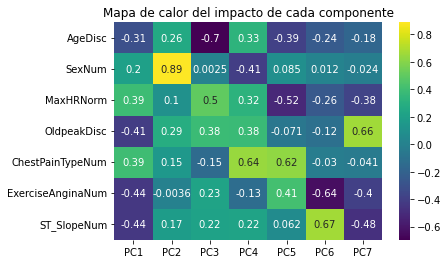

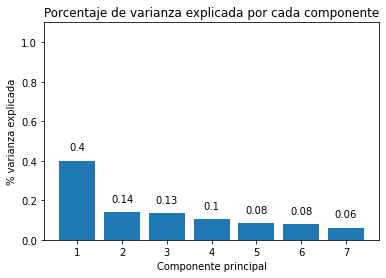

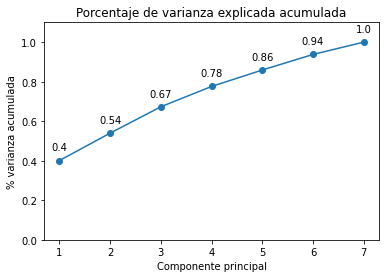

In [83]:
feats=["AgeDisc", "SexNum", "MaxHRNorm", "OldpeakDisc", "ChestPainTypeNum", "ExerciseAnginaNum", "ST_SlopeNum"]
analisisPCA(feats, data)

Vemos como los mejores resultados los hemos obtenido cuando hemos usado las variables Edad (normalizada), Pulsaciones máximas (normalizadas), Segmento T (discretizado) y Colesterol (discretizado), dado que sólo con el primer componente principal, ya explicamos el 40% de la varianza.

También hemos obtenido buenos resultados con las variables Edad (discretizada), Sexo, Pulsaciones máximas (normalizadas), Segmento T (discretizado), Tipo de dolor pectoral, Angina inducida y elevación del Segmento T, con resultados similares a cuando hemos usado las variables anteriores.

# **Modelado**<a id="4"></a>

En esta segunda práctica, vamos a realizar la parte del modelado usando los datos de la práctica anterior.

Para realizar el modelado, usaremos las variables que hemos visto que mejores resultados nos daban en la práctica anterior. Éstos son: 
- Edad (discretizada y normalizada)
- Pulsaciones máximas (normalizadas)
- Edad (discretizada)
- Sexo
- Tipo de dolor pectoral,
- Angina inducida
- Elevación del Segmento T


Empezamos importando todas las librerías necesarias:

In [84]:
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from matplotlib.pylab import rcParams
from dtreeviz import trees
from dtreeviz.models.xgb_decision_tree import ShadowXGBDTree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

## Modelos no supervisados<a id="41"></a>

Ahora vamos a realizar un modelo no supervisado de tipo K-Means.

Text(0.5, 1.0, 'Selección del mejor número de clústers')

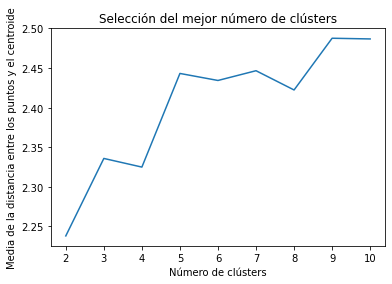

In [85]:
# Edad (normalizada), Pulsaciones máximas (normalizadas), Segmento T (discretizado),
# Colesterol (discretizado), Edad (discretizada), Sexo, Tipo de dolor pectoral,
# Angina inducida y elevación del Segmento T

feats=["AgeDisc", "SexNum", "MaxHRNorm", "OldpeakDisc", "ChestPainTypeNum", "ExerciseAnginaNum",
       "ST_SlopeNum"]
data_cl = data
data_cl = data_cl[feats]
data_cl = data_cl.join(data["HeartDisease"])


resultados = []
indices = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n in indices:
    kmeans = KMeans(n_clusters=n, random_state=0)
    data_cd = kmeans.fit_transform(data_cl[feats])
    resultados.append(data_cd.mean())
sns.lineplot(indices, resultados)
plt.xlabel("Número de clústers")
plt.ylabel("Media de la distancia entre los puntos y el centroide")
plt.title("Selección del mejor número de clústers")

Podemos observar que según el cálculo de la media de distancia entre los puntos y el ccentroide, lo más optimo es realizar un modelo con 2 clústers, lo cual tiene mucho sentido, dado que nuestra variable target nos indica si el paciente tiene alguna ECV o no, de modo que es una variable booleana (sólo puede ser 0 o 1).

Realizamos el modelado y mostramos los datos por pantalla para poder ver cómo ha realizado la clasificación el modelo.

In [86]:
kmeans = KMeans(n_clusters=2, random_state=0)
data["Cluster"] = kmeans.fit_predict(data_cl[feats])
#data_cl["Cluster"] = kmeans.fit_predict(data_cl[feats])


data["Cluster"].replace([0, 1], [1, 0], inplace=True)

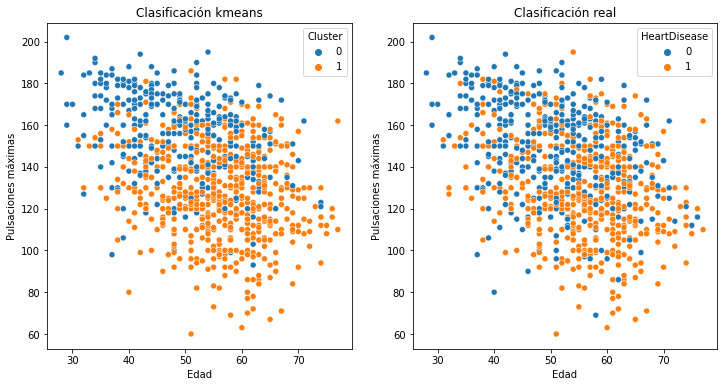

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(data=data, x="Age", y="MaxHR", hue="Cluster", ax=ax[0])
ax[0].set_title("Clasificación kmeans")
ax[0].set_xlabel("Edad")
ax[0].set_ylabel("Pulsaciones máximas")

sns.scatterplot(data=data, x="Age", y="MaxHR", hue="HeartDisease", ax=ax[1])
ax[1].set_title("Clasificación real")
ax[1].set_xlabel("Edad")
ax[1].set_ylabel("Pulsaciones máximas")

plt.show()

A primera vista vemos buenos resultados, pero recordemos que es un algoritmo no supervisado, de modo que vamos a usar métricas de éste tipo para ver la calidad del modelo.

In [88]:
estimator = make_pipeline(StandardScaler(), kmeans).fit(data_cl[feats])
print("Silhouette: " + 
      str(round((silhouette_score(data_cl, estimator[-1].labels_, metric="euclidean")), 3)))

Silhouette: 0.272


Como vemos, este modelo con 2 clústers nos proporciona una *Silhouette* de 0.278 que, aunque está muy lejos de ser un resultado perfecto, para ser datos tan entremezclados como hemos visto que son estos, podemos decir que es un buen resultado.

Hacemos ahora la prueba con 4 clústers.

In [89]:
kmeans = KMeans(n_clusters=4, random_state=0)
data["Cluster"] = kmeans.fit_predict(data_cl[feats])

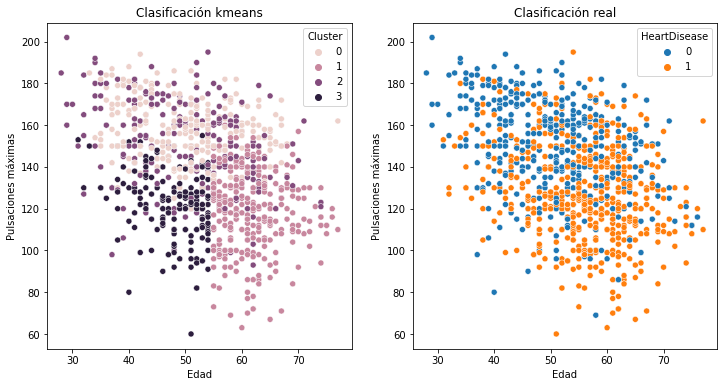

In [90]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(data=data, x="Age", y="MaxHR", hue="Cluster", ax=ax[0])
ax[0].set_title("Clasificación kmeans")
ax[0].set_xlabel("Edad")
ax[0].set_ylabel("Pulsaciones máximas")

sns.scatterplot(data=data, x="Age", y="MaxHR", hue="HeartDisease", ax=ax[1])
ax[1].set_title("Clasificación real")
ax[1].set_xlabel("Edad")
ax[1].set_ylabel("Pulsaciones máximas")

plt.show()

Aquí vemos que los clústers están muy entremezclados y no se aprecia ningún patron visual que pueda indicarnos que las separaciones son correctas.

In [91]:
estimator = make_pipeline(StandardScaler(), kmeans).fit(data_cl)
print("Silhouette: " + 
      str(round((silhouette_score(data_cl, estimator[-1].labels_, metric="euclidean")), 3)))

Silhouette: 0.117


Vemos pues, que con 4 clústers obtenemos una puntuación de *Silhouette* de 0.141, la cual es notablemente peor que con 2 clústers.

Finalmente, realizamos la prueba con 3 clústers.

In [92]:
kmeans = KMeans(n_clusters=3, random_state=0)
data["Cluster"] = kmeans.fit_predict(data_cl[feats])
data_cl["Cluster"] = kmeans.fit_predict(data_cl[feats])

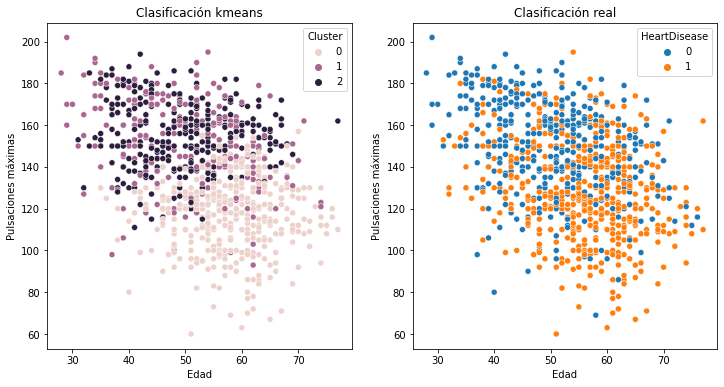

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(data=data, x="Age", y="MaxHR", hue="Cluster", ax=ax[0])
ax[0].set_title("Clasificación kmeans")
ax[0].set_xlabel("Edad")
ax[0].set_ylabel("Pulsaciones máximas")

sns.scatterplot(data=data, x="Age", y="MaxHR", hue="HeartDisease", ax=ax[1])
ax[1].set_title("Clasificación real")
ax[1].set_xlabel("Edad")
ax[1].set_ylabel("Pulsaciones máximas")

plt.show()

In [94]:
estimator = make_pipeline(StandardScaler(), kmeans).fit(data_cl)
print("Silhouette: " + 
      str(round((silhouette_score(data_cl, estimator[-1].labels_, metric="euclidean")), 3)))

Silhouette: 0.268


Al calcular la métrica *Silhouette* vemos que, aunque se acerca a los niveles obtenidos con 2 clústers, el modelo no llega a ser tan bueno.

### Otra métrica (Davies Bouldin)

In [95]:
def dbScore(clusters):
    kmeans = KMeans(n_clusters=clusters, random_state=0)
    data["Cluster"] = kmeans.fit_predict(data_cl[feats])
    data_cl["Cluster"] = kmeans.fit_predict(data_cl[feats])
    result = davies_bouldin_score(data_cl, estimator[-1].labels_)
    print("Métrica Davies Bouldin para " + str(clusters) + " clústers: " + str(result) + "\n")

In [96]:
dbScore(2)
dbScore(3)
dbScore(4)

Métrica Davies Bouldin para 2 clústers: 1.9909097671907057

Métrica Davies Bouldin para 3 clústers: 1.83014523689354

Métrica Davies Bouldin para 4 clústers: 2.3141334498871675



Con ésta métrica podemos ver que el modelo con 3 clústers tiene mejor resultado de proximidad, lo cual puede ser algo interesante a investigar en otro momento.

## DBSCAN + OPTICS<a id="42"></a>

Vamos a hacer ahora un modelo DBSCAN y un modelo OPTICS.

### DBSCAN

In [97]:
data_db = data

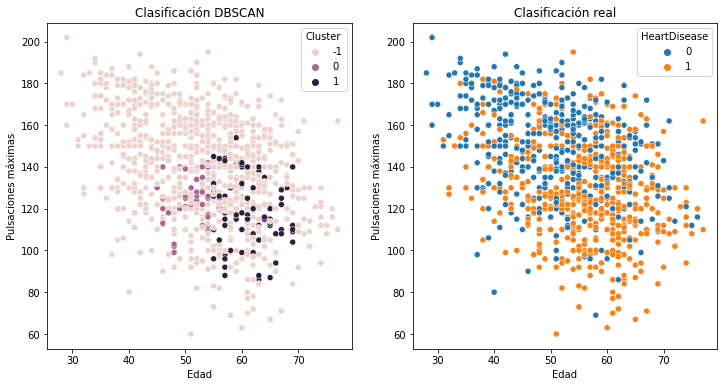

In [98]:
data_db["Cluster"] = DBSCAN(eps=0.5, min_samples=25).fit_predict(data_cl[feats])

estimator = make_pipeline(StandardScaler(), DBSCAN(eps=0.5, min_samples=30)).fit(data_db[feats])


fig, ax = plt.subplots(1, 2, figsize=(12, 6))


sns.scatterplot(data=data_db, x="Age", y="MaxHR", hue="Cluster", ax=ax[0])
ax[0].set_title("Clasificación DBSCAN")
ax[0].set_xlabel("Edad")
ax[0].set_ylabel("Pulsaciones máximas")
sns.scatterplot(data=data_db, x="Age", y="MaxHR", hue="HeartDisease", ax=ax[1])
ax[1].set_title("Clasificación real")
ax[1].set_xlabel("Edad")
ax[1].set_ylabel("Pulsaciones máximas")

plt.show()

In [99]:
print("Silhouette: " + 
      str(round(metrics.silhouette_score(data_db[feats], 
                                         estimator[-1].labels_, 
                                         metric="euclidean"), 3)))

Silhouette: -0.074


Si hacemos el modelo con una $\epsilon$ de 0.5 y un mínimo de 25 muestras, aunque vemos que nos genera los clústers que necesitamos, la nube de puntos y de observaciones que el modelo considera outliers es muy dispersa, y no aporta información relevante. Además, la métrica *Silhouette* está muy cercana a 0, lo cual indica que los clústers se superponen unos encima de otros. Así pues, probaremos con otros parámetros.

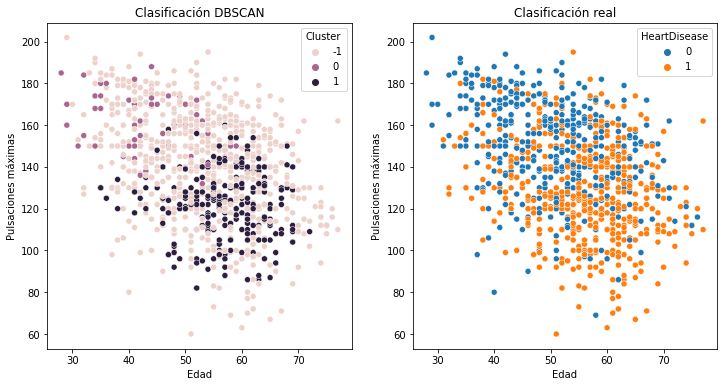

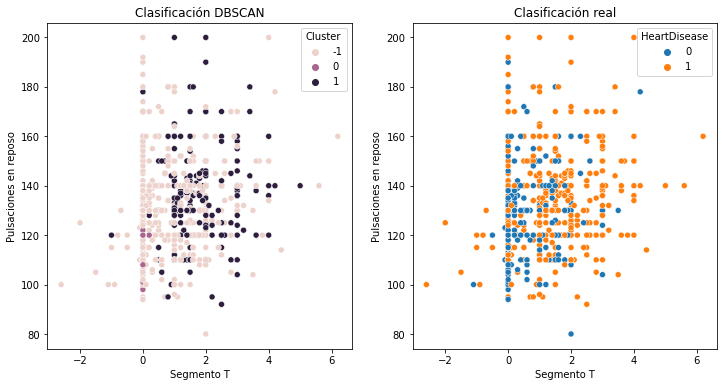

In [100]:
data_db["Cluster"] = DBSCAN(eps=1.0, min_samples=25).fit_predict(data_cl[feats])

estimator = make_pipeline(StandardScaler(), DBSCAN(eps=1.0, min_samples=30)).fit(data_db[feats])


fig, ax = plt.subplots(1, 2, figsize=(12, 6))


sns.scatterplot(data=data_db, x="Age", y="MaxHR", hue="Cluster", ax=ax[0])
ax[0].set_title("Clasificación DBSCAN")
ax[0].set_xlabel("Edad")
ax[0].set_ylabel("Pulsaciones máximas")
sns.scatterplot(data=data_db, x="Age", y="MaxHR", hue="HeartDisease", ax=ax[1])
ax[1].set_title("Clasificación real")
ax[1].set_xlabel("Edad")
ax[1].set_ylabel("Pulsaciones máximas")

plt.show()


fig, ax = plt.subplots(1, 2, figsize=(12, 6))


sns.scatterplot(data=data_db, x="Oldpeak", y="RestingBP", hue="Cluster", ax=ax[0])
ax[0].set_title("Clasificación DBSCAN")
ax[0].set_xlabel("Segmento T")
ax[0].set_ylabel("Pulsaciones en reposo")
sns.scatterplot(data=data_db, x="Oldpeak", y="RestingBP", hue="HeartDisease", ax=ax[1])
ax[1].set_title("Clasificación real")
ax[1].set_xlabel("Segmento T")
ax[1].set_ylabel("Pulsaciones en reposo")

plt.show()

In [101]:
print("Silhouette: " + 
      str(round(metrics.silhouette_score(data_db[feats], 
                                         estimator[-1].labels_, 
                                         metric="euclidean"), 3)))

Silhouette: -0.045


Manteniendo el mínimo de observaciones pero cambiando la $\epsilon$ a 1, vemos que mejora bastabte el modelo y ya se observa una separación más clara a simple vista incluso al comparar distintas variables. Sin embargo, al observar la métrica *Silhouette*, vemos algo que tambiéne se puede ver en las gráficas, que es la superposición de los clústers, aunque no es tan exagerada como en el caso anterior.

### OPTICS

Vamos a ver ahora la alcanzabilidad de este modelo mediante OPTICS.

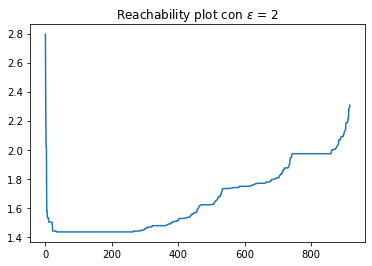

In [102]:
clust = OPTICS(min_samples=250, max_eps=25).fit(data_cl[feats])
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]


reachability.round(1)

plt.plot(reachability)
plt.title("Reachability plot con $\epsilon$ = 2")
plt.show()

Con unos parámetros demasiado altos, casi ninguna observaciónn entra en algun clúster.

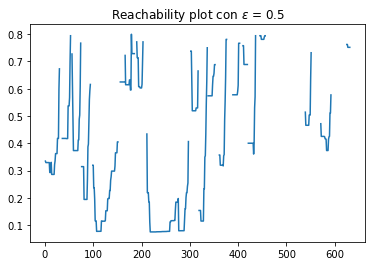

In [103]:
clust = OPTICS(min_samples=10, max_eps=0.8).fit(data_cl[feats])
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]


reachability.round(1)

plt.plot(reachability)
plt.title("Reachability plot con $\epsilon$ = 0.5")
plt.show()

Con unos parámetros demasiado pequeños, vemos que hay muchas observaciones que no se encuentran en nuestra función y se crean demasiados clústers.

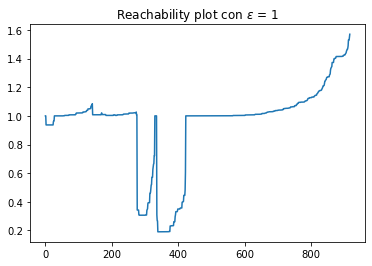

In [104]:
clust = OPTICS(min_samples=25, eps=1).fit(data_cl[feats])
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]


reachability.round(1)

plt.plot(reachability)
plt.title("Reachability plot con $\epsilon$ = 1")
plt.show()

En un punto intermedio, vemos que se sigue una forma en la que se ven claramente 2 clústers que se pueden formar.

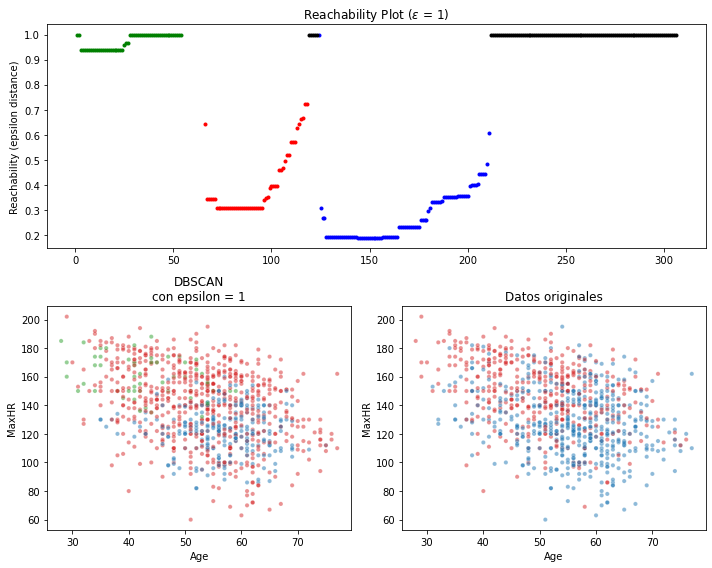

In [105]:
X = data_cl[feats].to_numpy()

m_s = 25

eps = 1

clust = OPTICS(min_samples=m_s, max_eps=eps)
clust.fit(X)


space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(10, 8))
G = gridspec.GridSpec(2, 2)
ax1 = plt.subplot(G[0, :])
#ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 0])
ax4 = plt.subplot(G[1, 1])

# Reachability plot
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color)
ax1.plot(space[labels == -1], reachability[labels == -1], "k.")
ax1.set_ylabel("Reachability (epsilon distance)")
ax1.set_title("Reachability Plot ($\epsilon$ = 1)")

'''# OPTICS
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.5)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], "k+", alpha=0.5)
ax2.set_title("OPTICS\ncon epsilon = 25")
'''
# DBSCAN
data_db["Cluster"] = DBSCAN(min_samples=m_s, eps=eps).fit_predict(data_cl[feats])

sns.scatterplot(data=data_db, x="Age", y="MaxHR", hue="Cluster", ax=ax3, legend=False, alpha=0.5, size=0.5
                , palette=['tab:red', 'tab:green', 'tab:blue'])
ax3.set_title("DBSCAN\ncon epsilon = 1")


# Datos originales
sns.scatterplot(data=data_db, x="Age", y="MaxHR", hue="HeartDisease", ax=ax4, legend=False, alpha=0.5, size=0.5, palette=['tab:red', 'tab:blue'])
ax4.set_title("Datos originales")

plt.tight_layout()
plt.show()

Con los valores $\epsilon$ = 1 y como mínimo 25 observaciones en cada clúster, se observan unos buneos niveles de alcanzabilidad y se ven clústers bastante definidos y acorde con la realidad.

## Árboles de decisión<a id="43"></a>

Vamos a modelar ahora un árbol de decisión que nos genere unas reglas para, poniéndonos en la piel de un médico, que con unas pocas pruebas o preguntas pueda hacer ya una estimación de si el paciente tiene una ECV o no.

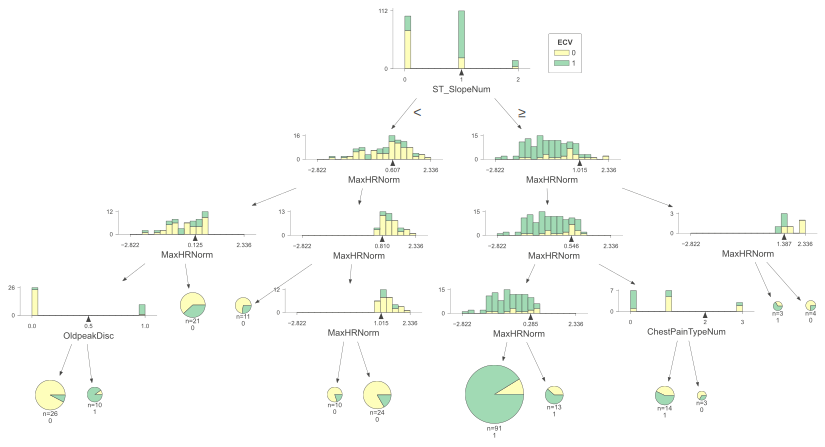

In [106]:
X = data_cl[feats]
y = data["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model_XGB = XGBClassifier(max_depth=4, random_state=0)

model_XGB.fit(X_train, y_train)

y_test_pred = model_XGB.predict(X_test)


model_XGB.best_iteration
best_tree = model_XGB.best_iteration

viz = trees.model(model_XGB, X_test, y_test, target_name='ECV', tree_index=best_tree,
                  feature_names=list(X.columns.values), class_names=[0, 1])

viz.view()

### Reglas del modelo

Podemos observar que la primera gran separación está en la variable de la elevación del segmento T, donde vemos que en los casos en los que ésta esté haca arriba (la primera columna), las probabilidades de que el paciente tenga una ECV se reducen muchísimo, y sólo se ven incrementadas cuando su Segmento T se distancia de 0 (en la variable 'OldpeakDisc').

Sin embargo, cuando la elevación del Segmento T sea plana o hacia abajo, las probabilidades de desarrollar una ECV se disparan, y sólo se ven reducidas según el tipo de dolor pectoral que experimente el paciente.

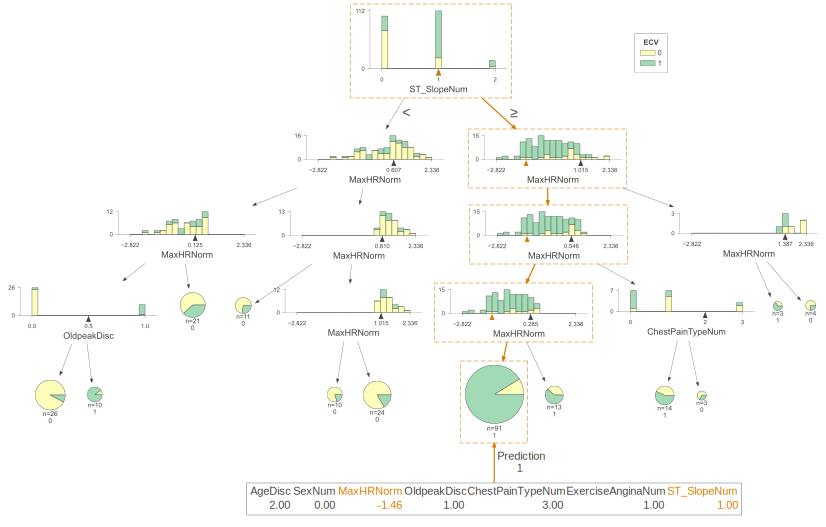

In [107]:
x = data_cl[feats].iloc[11]

viz.view(x=x)

En éste ejemplo vemos un caso bastante claro de un paciente con ECV, que no sólo tiene la elevación del Segmento T plana sinó que además sus pulsaciones máximas son bastante bajas (algo que normalmente está relacionado con la edad, tal y como vimos en la práctica anterior).

In [108]:
print("Score del modelo:")
print(str(cross_val_score(model_XGB, X_test, y_test).mean().round(2)*100) + "%")

Score del modelo:
83.0%


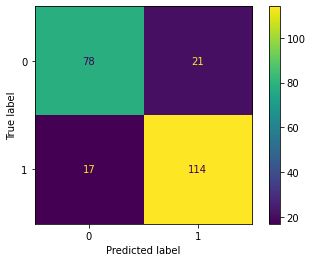

Porcentaje de falsos negativos: 12.98%


In [109]:
cm = confusion_matrix(y_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

print("Porcentaje de falsos negativos: " + str(round((cm[1][0]/(cm[1][1]+cm[1][0]))*100, 2)) + "%")

Podemos observar que éste modelo tiene una *Score* bastante alta, de 83%.

Por otro lado, en este caso creemos que lo más significativo para tener en cuenta son los falsos negativos, dado que en caso de que se diese un falso negativo, un paciente podría no ser intervenido o explorado en mayor profundidad y se podría agravar la ECV, mientras que en el caso de los falsos positivos, sólo habría el inconveniente que se deberían realizar más pruebas posteriormente para descartar la existencia de éste tipo de enfermedad.

Así pues, con éste árbol, hemos conseguido un porcentaje de falsos negativos del 13% aproximadamente, lo cual nos indica que, aunque es un buen modelo, no debería usarse como único método, sino quizas, como primera aproximación.

## Otro enfoque algorítmico (KNN)<a id="44"></a>

Ahora vamos a realizar otro enfoque en el que usaremos el algoritmo KNN, y compararemos los resultados al utilizar distintos parámetros.

Empezamos con **250** *Neighbours*:

In [110]:
data_knn = data

X = data_knn[feats]
y = data_knn["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

neigh = KNeighborsClassifier(n_neighbors=250)
neigh.fit(X_train, y_train)
y_test_pred = neigh.predict(X_test)

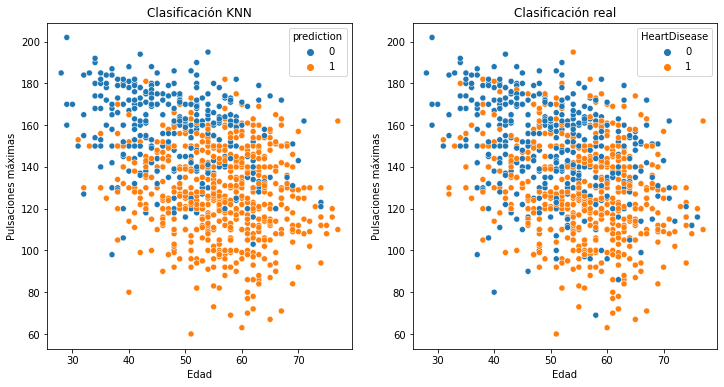

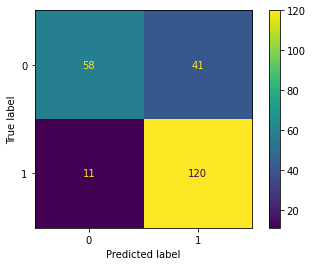

Porcentaje de falsos negativos: 8.4%
Score del modelo: 78.74%


In [111]:
data_knn["prediction"] = neigh.predict(X)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))


sns.scatterplot(data=data_knn, x="Age", y="MaxHR", hue="prediction", ax=ax[0])
ax[0].set_title("Clasificación KNN")
ax[0].set_xlabel("Edad")
ax[0].set_ylabel("Pulsaciones máximas")
sns.scatterplot(data=data_knn, x="Age", y="MaxHR", hue="HeartDisease", ax=ax[1])
ax[1].set_title("Clasificación real")
ax[1].set_xlabel("Edad")
ax[1].set_ylabel("Pulsaciones máximas")

plt.show()

cm = confusion_matrix(y_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

print("Porcentaje de falsos negativos: " + str(round((cm[1][0]/(cm[1][1]+cm[1][0]))*100, 2)) + "%")
print("Score del modelo: " + str(round(neigh.score(X, y)*100, 2)) + "%")

Podemos ver que con 250 Neighbours, la *Score* del modelo es de 78.74%, mientras que tenemos un 8.4% de falsos negativos, lo cual es una mejora respecto al árbol anterior. Sin embargo, podemos ver como han aumentado considerablemente los falsos positivos (41.4%)

Modelamos ahora con **150** *Neighbours*:

In [112]:
data_knn = data

X = data_knn[feats]
y = data_knn["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

neigh = KNeighborsClassifier(n_neighbors=150)
neigh.fit(X_train, y_train)
y_test_pred = neigh.predict(X_test)

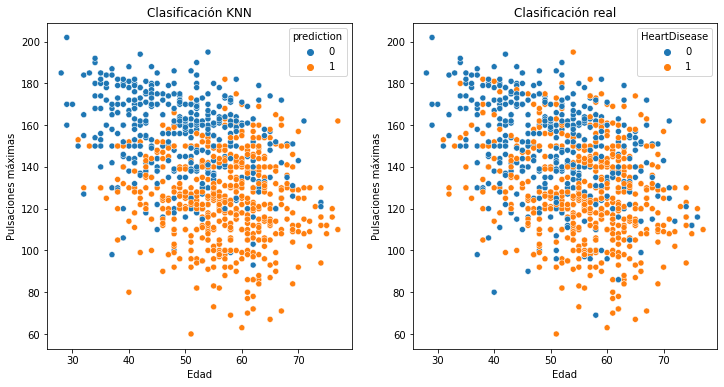

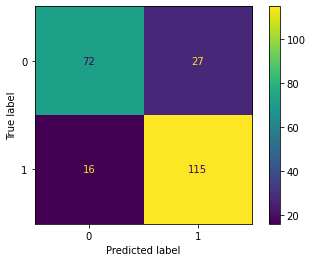

Porcentaje de falsos negativos: 12.21%
Score del modelo: 80.81%


In [113]:
data_knn["prediction"] = neigh.predict(X)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))


sns.scatterplot(data=data_knn, x="Age", y="MaxHR", hue="prediction", ax=ax[0])
ax[0].set_title("Clasificación KNN")
ax[0].set_xlabel("Edad")
ax[0].set_ylabel("Pulsaciones máximas")
sns.scatterplot(data=data_knn, x="Age", y="MaxHR", hue="HeartDisease", ax=ax[1])
ax[1].set_title("Clasificación real")
ax[1].set_xlabel("Edad")
ax[1].set_ylabel("Pulsaciones máximas")

plt.show()

cm = confusion_matrix(y_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

print("Porcentaje de falsos negativos: " + str(round((cm[1][0]/(cm[1][1]+cm[1][0]))*100, 2)) + "%")
print("Score del modelo: " + str(round(neigh.score(X, y)*100, 2)) + "%")

En este caso nos pasa al revés, dado que aumenta la *Score* del modelo, pero también aumentan los falsos negativos, aunque se han reducido notablemente los falsos positivos hasta aproximadamente el 25%.

Finalmente, hacemos la prueba con **350** *Neighbours*:

In [114]:
data_knn = data

X = data_knn[feats]
y = data_knn["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

neigh = KNeighborsClassifier(n_neighbors=350)
neigh.fit(X_train, y_train)
y_test_pred = neigh.predict(X_test)

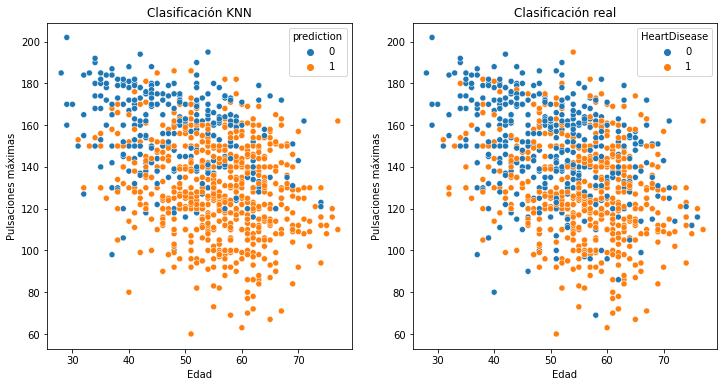

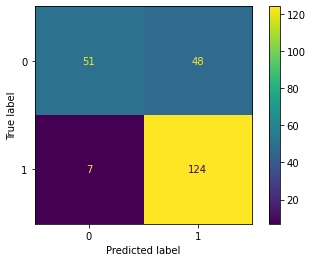

Porcentaje de falsos negativos: 5.34%
Score del modelo: 77.75%


In [115]:
data_knn["prediction"] = neigh.predict(X)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))


sns.scatterplot(data=data_knn, x="Age", y="MaxHR", hue="prediction", ax=ax[0])
ax[0].set_title("Clasificación KNN")
ax[0].set_xlabel("Edad")
ax[0].set_ylabel("Pulsaciones máximas")
sns.scatterplot(data=data_knn, x="Age", y="MaxHR", hue="HeartDisease", ax=ax[1])
ax[1].set_title("Clasificación real")
ax[1].set_xlabel("Edad")
ax[1].set_ylabel("Pulsaciones máximas")

plt.show()

cm = confusion_matrix(y_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

print("Porcentaje de falsos negativos: " + str(round((cm[1][0]/(cm[1][1]+cm[1][0]))*100, 2)) + "%")
print("Score del modelo: " + str(round(neigh.score(X, y)*100, 2)) + "%")

Finalmente, con 350 neighbours, se vuelven a reducir tanto la *Score* como los falsos negativos, pero se mantienen aproximadamente los falsos positivos.

En resumen, podemos ver que a medida que aumentamos los neighbours, reducimos los falsos negativos a cambio de aumentar los falsos positivos y reducir la *Score* del modelo, de modo que dependiendo de lo que se quiera conseguir, habrá que utilizar unos u otros parámetros.

## Limitaciones y riesgos<a id="45"></a>

Hemos visto que con los datos que tenemos, lo primero de todo y más importante es hacer una adaptación para que se acomoden lo mejor posible al modelo, y aún así, no obtenemos unos resultados ni mucho menos perfectos, aunque sí que mejoran mucho que si tan sólo utilizásemos las observaciones iniciales o un *EDA*.

Siguiendo con los datos, hemos podido ver que usando las variables que tienen los médicos para poder diagnosticar una ECV, es muy difícil conseguir un correcto diagnóstico, aún adaptando los datos y usando modelos y algoritmos avanzados, lo cual pone en valor la labor que éstos realizan al hacer diagnósticos con unas variables y observaciones que no crean claramente dos grupos separados entre pacientes con ECV y pacientes sin éstas, sino que vemos muchas observaciones entremezcladas y pacientes que a priori podría parecer que tienen una ECV, resulta que no la tienen y otros que aparentemente están sanos, tienen una ECV contra todo pronóstico.

Otra consideración a tener en cuenta, es que éste conjunto de datos tiene un cierto sesgo, dado que la distribución no es la habitual entre la población tanto a nivel de sexo, de edad, etc., pero sobretodo al ver la cantidad de observaciones de pacientes con ECV, dado que vemos que aproximadamente la mitad de las observaciones tienen una ECV, lo cual en la población real esto no ocurre, lo que hace pensar que se han tomado observaciones de pacientes de los cuales ya había una primera sospecha de que tuviesen algún tipo de patología de éste tipo y se haya realizado ya un primer filtro que no nos permita hacer el modelo más preciso.

Finalmente, es importante tener en cuenta el principal riesgo que puede suponer un modelo de éste tipo, y es que puede darse el caso de que aparezcan falsos negativos, de forma que se podría dar el alta a pacientes que realmente tuviesen una ECV, posibilitando así el hecho de que ésta se agravase o que no se puediese combatir a tiempo, de modo que, aunque éste tipo de modelos avanzan a pasos agigantados, en el campo de la medicina (así como en muchos otros campos), éstos modelos deban ser una herramienta que sirva para ayudar al profesional, pero nunca un sustituto de éste profesional, dado que es quien debe tener la última palabra.

# Conclusiones práctica 1<a id="5"></a>

En esta práctica hemos hecho un planteamiento de lo que podría ser un problema real, en el que hemos hecho toda la preparación previa de un juego de datos antes de la aplicación del modelado.

El problema que hemos decidido plantear ha sido el de las enfermedades cardiovasculares (ECV) y cuáles pueden ser sus principales causas o sus indicadores de riesgo. Hemos decidido hacer este estudio dado que las ECV son la principal causa de muerte en todo el mundo, de modo que consideramos importante saber cuales pueden ser sus raíces ya sea o bien para prevenirlas, o bien para detectarlas sa tiempo y así poder tratarlas a tiempo.

En primer lugar hemos importado y descrito los datos, y luego hemos hecho una limpieza de los datos, aunque el dataset ya venía con los datos muy bien acomodados. 

Luego hemos realizado un análisis exploratorio de los datos viéndolos desde distintas perspectivas o dimensiones para poder ver cómo se relacionan los datos tanto entre sí como en relación a las ECV. Las principales conclusiones que hemos podido sacar han sido que, a primera vista, los factores más decisivos son la edad, el sexo, el nivel de azucar, las pulsaciones máximas, la angina inducida por ejercicio y el segmento T. Un dato curioso que hemos observado ha sido que el colesterol no tiene un impacto muy decisivo.

Luego hemos hecho una acomodación de los datos para facilitar el modelado, y hemos hecho tareas de discretización, conversión de variables categóricas en variables numéricas, normalización y escalado.

Finalmente, hemos realizado un PCA, en el que hemos usado distintos grupos de variables, y hemos observado que las que mejor resultado nos han dado han sido las siguientes: Edad (normalizada), Pulsaciones máximas (normalizadas), Segmento T (discretizado) Colesterol (discretizado), Edad (discretizada), Sexo, Tipo de dolor pectoral, Angina inducida y elevación del Segmento T, de modo que serán variables que deberemos tener en cuenta al realizar el modelado, y ver como interactúan con el riesgo a sufrir una ECV.

En la próxima práctica veremos el modelado de estos datos y a ver cómo de precisas serán nuestras predicciones tras esta preparación de los datos.

# Bibliografía<a id="7"></a>

[Información Enfermedades Cardiovasculares (Wikipedia)](https://es.wikipedia.org/wiki/Enfermedades_cardiovasculares#)

[Información Enfermedades Cardiovasculares (MedlinePlus)](https://medlineplus.gov/spanish/ency/patientinstructions/000759.htm)

[Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

[PCA en Python (cienciadedatos.net)](https://www.cienciadedatos.net/documentos/py19-pca-python.html)

[Documentación PCA scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html#sklearn.preprocessing.normalize)

[Silhouette en Python](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

[Davies Bouldin en Python](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html#sklearn.metrics.davies_bouldin_score)

[Uso de DBSCAN en python](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

[OPTICS en python](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html#sklearn.cluster.OPTICS)

[Matriz de confusión en Python](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)

[KNN en python](https://scikit-learn.org/stable/modules/neighbors.html)